In [1]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd
import networkx as nx



/home/imager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
### come back to het 1654 looks ideal and 1655


#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
#fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 
#fly_nums = list(range(1389,1402))


#fly_nums = range(1635, 1637) + range(1637, 1639) + range(1640, 1643) + range(1645, 1647) + range(1648, 1651) + range(1653, 1654) #+ range(1655, 1656) 

#fly_nums = range(1658, 1665)
#relatively new


#even newer
fly_nums = range(1668, 1677)

multi_fly_df = util.construct_multi_fly_df(fly_nums)

all_stim_df = multi_fly_df



Making dataframe for fly number 1658
Making dataframe for fly number 1659
Making dataframe for fly number 1660
Making dataframe for fly number 1661
Making dataframe for fly number 1662
Making dataframe for fly number 1663
Making dataframe for fly number 1664


In [3]:
#flylist = [flb.NetFly(fn) for fn in (range(1635, 1637) + range(1637, 1639) + range(1640, 1643) + range(1645, 1647) + range(1648, 1651) + range(1653, 1654))]
flylist = [flb.NetFly(fn) for fn in (range(1658, 1665))]

[fly.open_signals() for fly in flylist]

[None, None, None, None, None, None, None]

In [4]:
multi_fly_df['l_plus_r'] = multi_fly_df['left_amp'] + multi_fly_df['right_amp']
all_stim_df = multi_fly_df


In [5]:
multi_fly_df.head()

t             stimulus  amp_diff  left_amp  right_amp  fly_num  \
0  0.000000  pretrial_stripe_fix -0.509838  0.720669   1.230507     1658   
1  0.020000  pretrial_stripe_fix -0.504045  0.726463   1.230507     1658   
2  0.040001  pretrial_stripe_fix -0.469283  0.732256   1.201539     1658   
3  0.060001  pretrial_stripe_fix -0.498251  0.755431   1.253681     1658   
4  0.080001  pretrial_stripe_fix -0.521425  0.726463   1.247888     1658   

     wbf                  experimental_condition   pr_left  tpd_left  \
0  223.0  condition=pretrial_closed_loop;gain=-1  3.997107  0.224091   
1  223.0  condition=pretrial_closed_loop;gain=-1  3.998413  0.268108   
2  223.0  condition=pretrial_closed_loop;gain=-1  4.126236  0.261533   
3  223.0  condition=pretrial_closed_loop;gain=-1  3.971655  0.493288   
4  223.0  condition=pretrial_closed_loop;gain=-1  4.028818  0.276793   

     ...     hg3_right  hg1_right  i1_right  bkg_right  b1_right  b2_right  \
0    ...           0.0   4.124232  1.436394  52.318676  3.907578  0.486813   
1    ...           0.0   4.230080  1.425441  52.292991  3.928064  0.458898   
2    ...           0.0   4.450647  1.456939  53.149499  3.958014  0.418428   
3    ...           0.0   2.403335  1.287715  52.759069  4.206602  0.707015   
4    ...           0.0   4.153643  1.435318  52.408525  3.885734  0.436466   

   b3_right  iii24_right  hg4_right  l_plus_r  
0  2.804041     2.503338        0.0  1.951176  
1  2.932955     2.391939        0.0  1.956970  
2  3.129824     2.512379        0.0  1.933795  
3  1.932202     3.909845        0.0  2.009112  
4  2.991567     2.493267        0.0  1.974350  

[5 rows x 41 columns]

In [6]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right' 'l_plus_r']
['exc_cl_starfield, g_x = 1, g_y=0, b_x =0, b_y = 0, ch=0'
 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pretrial_stripe_fix'
 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'trials_ended' 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']


In [7]:

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [8]:
#turn_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0']
#turn_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0']
#WSA_increase = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0']
#WSA_decrease = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0']

yaw_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
yaw_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_up = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_down = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_cw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_ccw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']




In [9]:
import pandas as pd
from collections import OrderedDict
from datetime import date

In [10]:
yaw_left.head()

t                                     stimulus  amp_diff  \
1331  26.620424  yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0 -0.544600   
1332  26.640424  yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0 -0.556187   
1333  26.660425  yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0 -0.538806   
1334  26.680425  yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0 -0.527219   
1335  26.700425  yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0 -0.509838   

      left_amp  right_amp  fly_num    wbf  \
1331  0.627971   1.172571     1658  222.5   
1332  0.633765   1.189952     1658  223.0   
1333  0.651146   1.189952     1658  223.0   
1334  0.639558   1.166777     1658  223.5   
1335  0.622177   1.132016     1658  223.5   

                      experimental_condition   pr_left  tpd_left    ...     \
1331  condition=pretrial_closed_loop;gain=-1  4.590022  0.138367    ...      
1332                      condition=baseline  4.457969  0.220432    ...      
1333                      condition=baseline  4.475144  0.381608    ...      
1334                      condition=baseline  4.695004  0.139973    ...      
1335                      condition=baseline  4.724978  0.078238    ...      

      hg3_right  hg1_right  i1_right  bkg_right  b1_right  b2_right  b3_right  \
1331        0.0   4.010802  1.590715  53.621777  3.971865  0.506334  2.723513   
1332        0.0   1.938157  1.345184  53.080408  4.153188  0.724654  1.723732   
1333        0.0   2.349432  1.405023  53.168539  4.115660  0.705087  1.934170   
1334        0.0   4.318617  1.558397  52.932734  3.973227  0.487483  2.900638   
1335        0.0   4.169893  1.568725  52.936029  3.968043  0.478425  2.815842   

      iii24_right  hg4_right  l_plus_r  
1331     2.758575   0.000000  1.800542  
1332     4.183755   0.000000  1.823716  
1333     4.036662   0.000000  1.841097  
1334     2.501597   0.029515  1.806336  
1335     2.706441   0.000000  1.754193  

[5 rows x 41 columns]

In [15]:
##### for the WSA/ kinemcatics column

In [11]:
y = yaw_left.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

124

In [12]:
new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

In [13]:
counter = 0
yaw_left['trial'] = ""
for trial_ind in new_trial_inds: 
    if counter == 0:
        yaw_left['trial'][0:trial_ind] = counter
    else: 
        yaw_left['trial'][new_trial_inds[counter-1]: trial_ind] = counter
    counter += 1

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/pandas/core/series.py:767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/home/imag

In [14]:
#d = pd.DataFrame()
main_df = pd.DataFrame()
dfe= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_left.loc[(yaw_left['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df[counter] = ee
        if len(ee) >= 450:
            main_df[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]



In [15]:
main_df.head()

0         2         4         6         8         10        12   \
0 -0.544600 -0.608330 -0.011587 -0.556187 -0.509838 -0.521425 -0.544600   
1 -0.556187 -0.625710 -0.115872 -0.585155 -0.527219 -0.556187 -0.561981   
2 -0.538806 -0.614123 -0.034762 -0.561981 -0.515632 -0.585155 -0.521425   
3 -0.527219 -0.643091  0.057936 -0.538806 -0.527219 -0.643091 -0.527219   
4 -0.509838 -0.648885 -0.063730 -0.550393 -0.573568 -0.515632 -0.544600   

        14        16        18     ...          104       106       108  \
0 -0.538806 -0.498251 -0.115872    ...     0.607425  0.178327 -0.044582   
1 -0.561981 -0.405553 -0.133253    ...     0.573989  0.211763  0.055727   
2 -0.509838 -0.440315 -0.115872    ...     0.635288  0.273063  0.027864   
3 -0.579362 -0.498251 -0.104285    ...     0.534980  0.300926 -0.033436   
4 -0.567774 -0.498251 -0.098491    ...     0.518262  0.234054 -0.027864   

        110       112       114       116       118       120       122  
0  0.384517  0.378944  0.434671  0.479253  0.495971  0.239626  0.295353  
1  0.378944  0.356653  0.406807  0.468107  0.473680  0.395662  0.295353  
2  0.462534  0.367799  0.423526  0.468107  0.484825  0.562843  0.289781  
3  0.456962  0.384517  0.390089  0.484825  0.456962  0.451389  0.328790  
4  0.462534  0.367799  0.406807  0.479253  0.507116  0.445816  0.328790  

[5 rows x 62 columns]

In [16]:
from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA = np.mean(main_df, axis =1)  #mean
#error = main_df.stack().std()  
error = main_df.std(axis = 1, skipna = True)
yaw_1 = main_df[0]
yaw_2 = main_df[2]
yaw_3 = main_df[4]
yaw_4 = main_df[8]
yaw_9 = main_df[12]
yaw_11 = main_df[18]
#print(error)
inds = np.arange(0, 450)
time =inds/50

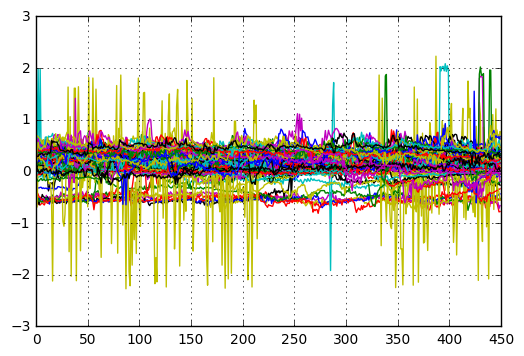

In [17]:
len(mean_WBA)

fig, ax = plt.subplots()
ax.plot(time, mean_WBA)

for col in main_df.columns:
    ax.plot(inds, main_df[col])

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()

#fig.savefig("test.png")
plt.show()

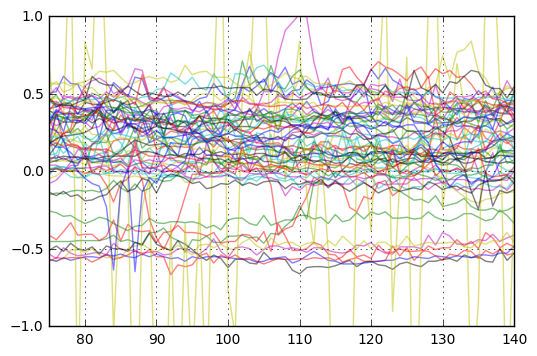

In [38]:
len(mean_WBA)

fig, ax = plt.subplots()
ax.plot(time, mean_WBA)

for col in main_df.columns:
    ax.plot(inds, main_df[col], alpha = 0.5)

#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#       title='About as simple as it gets, folks')
ax.grid()
ax.set_xlim(75, 140)
ax.set_ylim((-1, 1))

#fig.savefig("test.png")
plt.show()

In [35]:
#main_df.plot(subplots=True)
#plt.show()

#import matplotlib.pyplot as plt

#for i in range(main_df.shape()):
#    plt.plot(main_df[i])
#    plt.show()
#    plt.close()

In [18]:
y2 = yaw_right.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
yaw_right['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        yaw_right['trial'][0:trial_ind] = counter
    else: 
        yaw_right['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_yaw_right = pd.DataFrame()
dfe_yaw_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_right.loc[(yaw_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_yaw_right[counter] = ee
        if len(ee) >= 450:
            main_df_yaw_right[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_yaw_right[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_yaw_right = np.mean(main_df_yaw_right, axis =1)  #mean
sameple_yaw_1 = main_df_yaw_right[0]
sameple_yaw_2 = main_df_yaw_right[2]
sameple_yaw_3 = main_df_yaw_right[4]
sameple_yaw_4 = main_df_yaw_right[8]
sameple_yaw_9 = main_df_yaw_right[12]
sameple_yaw_11 = main_df_yaw_right[18]
#error = main_df.stack().std()  
error_yaw_right = main_df_yaw_right.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
y2 = pitch_up.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
pitch_up['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        pitch_up['trial'][0:trial_ind] = counter
    else: 
        pitch_up['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_up = pd.DataFrame()
dfe_pitch_up= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_up.loc[(pitch_up['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['l_plus_r']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_pitch_up[counter] = ee
        if len(ee) >= 450:
            main_df_pitch_up[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_pitch_up[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
pu_1 = main_df_pitch_up[0]
pu_2 = main_df_pitch_up[2]
pu_3 = main_df_pitch_up[4]
pu_4 = main_df_pitch_up[8]
pu_9 = main_df_pitch_up[12]
pu_11 = main_df_pitch_up[18]
mean_WBA_pitch_up = np.mean(main_df_pitch_up, axis =1)  #mean
#error = main_df.stack().std()  
error_pitch_up = main_df_pitch_up.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50.

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
y2 = pitch_down.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
pitch_down['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        pitch_down['trial'][0:trial_ind] = counter
    else: 
        pitch_down['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_pitch_down = pd.DataFrame()
dfe_pitch_down= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = pitch_down.loc[(pitch_down['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['l_plus_r']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_pitch_down[counter] = ee
        if len(ee) >= 450:
            main_df_pitch_down[counter] = ee[0:450]    
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_pitch_down[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
pd_1 = main_df_pitch_down[0]
pd_2 = main_df_pitch_down[2]
pd_3 = main_df_pitch_down[4]
pd_4 = main_df_pitch_down[8]
pd_9 = main_df_pitch_down[12]
pd_11 = main_df_pitch_down[18]
mean_WBA_pitch_down = np.mean(main_df_pitch_down, axis =1)  #mean
#error = main_df.stack().std()  
error_pitch_down = main_df_pitch_down.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
y2 = roll_cw.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
roll_cw['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        roll_cw['trial'][0:trial_ind] = counter
    else: 
        roll_cw['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_roll_cw = pd.DataFrame()
dfe_roll_cw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_cw.loc[(roll_cw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_roll_cw[counter] = ee
        if len(ee) >= 450:
            main_df_roll_cw[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_roll_cw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_roll_cw = np.mean(main_df_roll_cw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_cw = main_df_roll_cw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
y2 = roll_ccw.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y2))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()

counter = 0
roll_ccw['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        roll_ccw['trial'][0:trial_ind] = counter
    else: 
        roll_ccw['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_roll_ccw = pd.DataFrame()
dfe_roll_ccw= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = roll_ccw.loc[(roll_ccw['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_roll_ccw[counter] = ee
        if len(ee) >= 450:
            main_df_roll_ccw[counter] = ee[0:450]
        else:
            for i in range(450-len(ee)):
                ee.append(0)
            main_df_roll_ccw[counter] = ee
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)
mean_WBA_roll_ccw = np.mean(main_df_roll_ccw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_ccw = main_df_roll_ccw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


In [24]:
def rad_to_deg (rad):
    r_deg = np.rad2deg((rad)/10 *2*np.pi)
    return r_deg

In [25]:
time =inds/50.

In [26]:
sameple_yaw_4 = sameple_yaw_4.fillna(0)
yaw_4 = yaw_4.fillna(0)

sameple_yaw_9 = sameple_yaw_9.fillna(0)
yaw_2 = yaw_2.fillna(0)



pu_4 = pu_4.fillna(0)
pu_2 = pu_2.fillna(0)

pu_1 = pu_1.fillna(0)
pu_3 = pu_3.fillna(0)
pu_11 = pu_11.fillna(0)
pu_9 = pu_9.fillna(0)


pd_1 = pd_1.fillna(0)
pd_3 = pd_3.fillna(0)
pd_11 = pd_11.fillna(0)
pd_9 = pd_9.fillna(0)

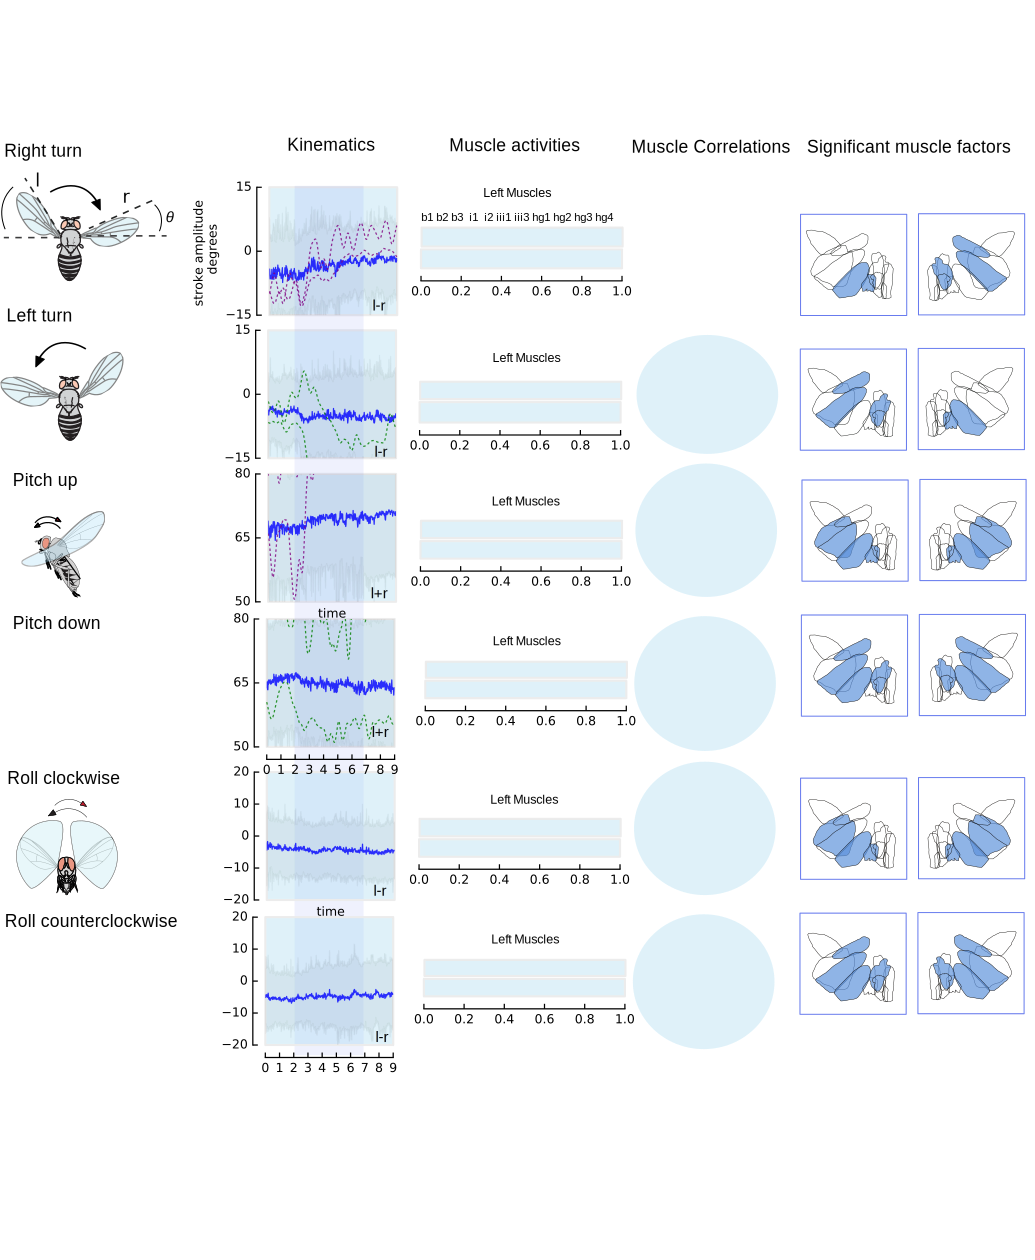

In [166]:
import numpy as np
import pandas as pd
import scipy

from scipy import signal

layout = fifi.FigureLayout('paper_figure_3_v2.svg',make_mplfigures = True)

filt_3 = smooth(rad_to_deg(yaw_4),window_len=35,window='hanning')
filt_5 = smooth(rad_to_deg(yaw_2),window_len=35,window='hanning')

layout.axes['l_turn_lmr'].plot(time, rad_to_deg(mean_WBA), color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].plot(time, filt_3[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].plot(time, filt_5[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA-error)), rad_to_deg((mean_WBA + error)), color = 'k', alpha = 0.05)
layout.axes['l_turn_lmr'].set_ybound(-15, 15)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['l_turn_lmr'].set_yticks([-15,  0, 15])

filt = signal.savgol_filter(rad_to_deg(sameple_yaw_4), 15, 1)
filt_2 = smooth(rad_to_deg(sameple_yaw_4),window_len=35,window='hanning')
filt_4 = smooth(rad_to_deg(sameple_yaw_9),window_len=35,window='hanning')


layout.axes['r_turn_lmr'].plot(time, rad_to_deg(mean_WBA_yaw_right),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].plot(time, filt_2[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].plot(time, filt_4[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA_yaw_right-error_yaw_right)), rad_to_deg(mean_WBA_yaw_right + error_yaw_right),color = 'k',alpha = 0.05)
layout.axes['r_turn_lmr'].set_ybound(-15, 15)
layout.axes['r_turn_lmr'].set_ylabel('stroke amplitude \n degrees')
layout.axes['r_turn_lmr'].set_yticks([-15, 0, 15])

pu_filt_1 = smooth(rad_to_deg(pu_1),window_len=35,window='hanning')
pu_filt_2 = smooth(rad_to_deg(pu_9),window_len=35,window='hanning')


layout.axes['pitch_up'].plot(time, rad_to_deg(mean_WBA_pitch_up), color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].plot(time, pu_filt_1[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].plot(time, pu_filt_2[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].fill_between(time, rad_to_deg(mean_WBA_pitch_up-error_pitch_up), rad_to_deg(mean_WBA_pitch_up + error_pitch_up),color = 'k',alpha = 0.05)
layout.axes['pitch_up'].set_ybound(50, 80)
layout.axes['pitch_up'].set_xlabel('time')
layout.axes['pitch_up'].set_yticks([50, 65, 80])

pd_filt_1 = smooth(rad_to_deg(pd_1),window_len=35,window='hanning')
pd_filt_2 = smooth(rad_to_deg(pd_9),window_len=35,window='hanning')

layout.axes['pitch_down'].plot(time, pd_filt_1[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].plot(time, pd_filt_2[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].plot(time, rad_to_deg(mean_WBA_pitch_down),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].fill_between(time, rad_to_deg(mean_WBA_pitch_down-error_pitch_down), rad_to_deg(mean_WBA_pitch_down + error_pitch_down),color = 'k',alpha = 0.05)
layout.axes['pitch_down'].set_ybound(50, 80)
layout.axes['pitch_down'].set_yticks([50, 65, 80])



layout.axes['roll_cw'].plot(time, rad_to_deg(mean_WBA_roll_cw),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['roll_cw'].fill_between(time, rad_to_deg(mean_WBA_roll_cw-error_roll_cw), rad_to_deg(mean_WBA_roll_cw + error_roll_cw),color = 'k',alpha = 0.05)
#layout.axes['roll_cw'].set_ybound(25, 100)
layout.axes['roll_cw'].set_xlabel('time')
#layout.axes['roll_cw'].set_yticks([25, 50, 75, 100])
layout.axes['roll_cw'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['roll_cw'].set_yticks([-20, -10, 0, 10, 20])

layout.axes['roll_ccw'].plot(time, rad_to_deg(mean_WBA_roll_ccw),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['roll_ccw'].fill_between(time, rad_to_deg(mean_WBA_roll_ccw-error_roll_ccw), rad_to_deg(mean_WBA_roll_ccw + error_roll_ccw),color = 'k',alpha = 0.05)
#layout.axes['roll_ccw'].set_ybound(25, 100)
#layout.axes['roll_ccw'].set_yticks([25, 50, 75, 100])
layout.axes['roll_ccw'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['roll_ccw'].set_yticks([-20, -10, 0, 10, 20])



fifi.mpl_functions.set_spines(layout)
layout.save('figure_4_new.svg')
plt.close('all')
display(SVG('figure_4_new.svg'))

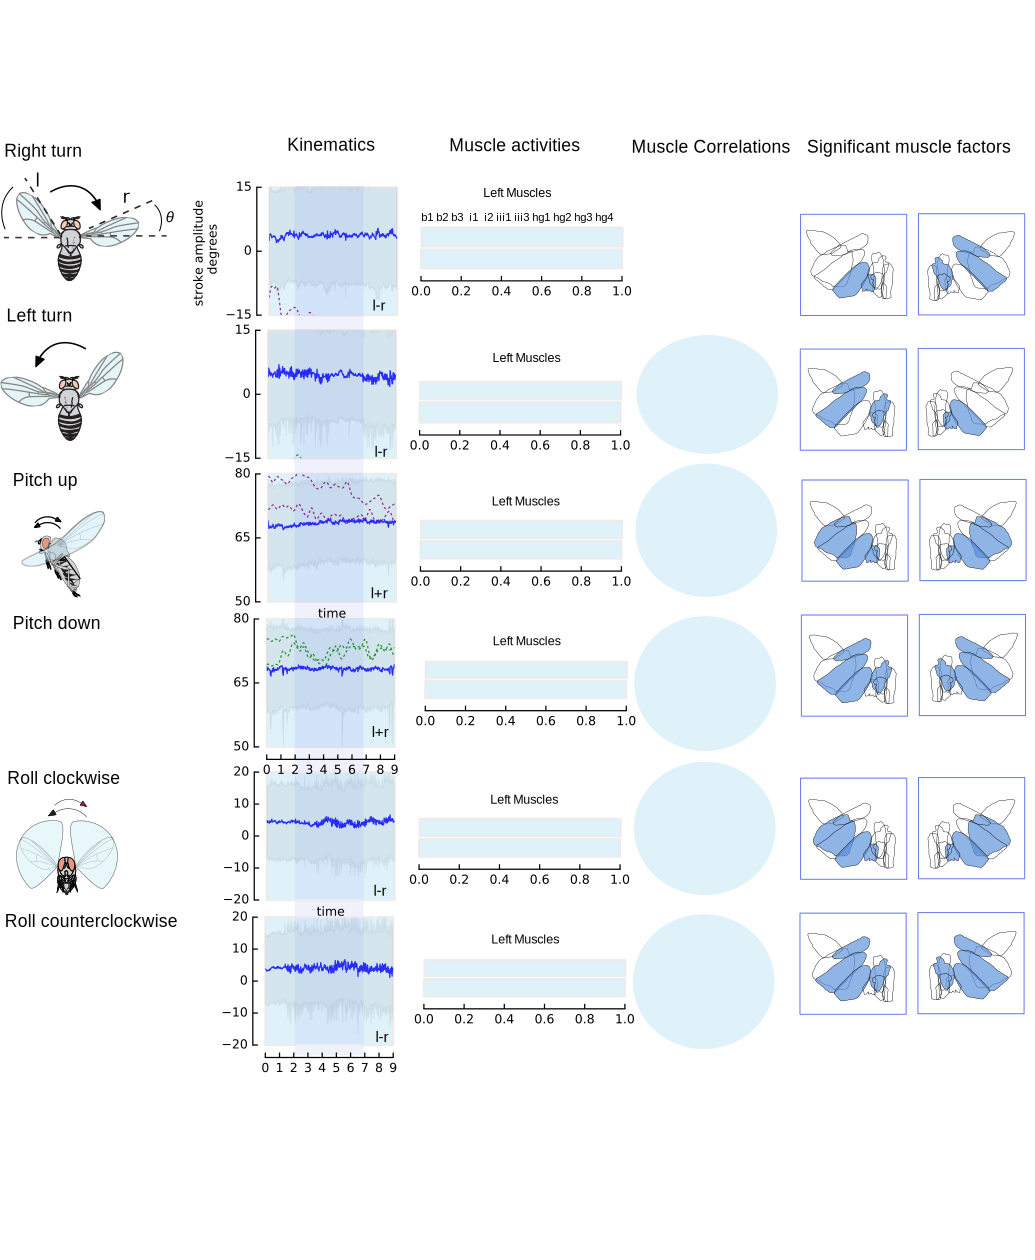

In [27]:
import numpy as np
import pandas as pd
import scipy

from scipy import signal

layout = fifi.FigureLayout('paper_figure_3_v2.svg',make_mplfigures = True)

filt_3 = smooth(rad_to_deg(yaw_4),window_len=35,window='hanning')
filt_5 = smooth(rad_to_deg(yaw_2),window_len=35,window='hanning')

layout.axes['l_turn_lmr'].plot(time, rad_to_deg(mean_WBA), color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].plot(time, filt_3[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].plot(time, filt_5[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA-error)), rad_to_deg((mean_WBA + error)), color = 'k', alpha = 0.05)
layout.axes['l_turn_lmr'].set_ybound(-15, 15)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['l_turn_lmr'].set_yticks([-15,  0, 15])

filt = signal.savgol_filter(rad_to_deg(sameple_yaw_4), 15, 1)
filt_2 = smooth(rad_to_deg(sameple_yaw_4),window_len=35,window='hanning')
filt_4 = smooth(rad_to_deg(sameple_yaw_9),window_len=35,window='hanning')


layout.axes['r_turn_lmr'].plot(time, rad_to_deg(mean_WBA_yaw_right),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].plot(time, filt_2[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].plot(time, filt_4[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA_yaw_right-error_yaw_right)), rad_to_deg(mean_WBA_yaw_right + error_yaw_right),color = 'k',alpha = 0.05)
layout.axes['r_turn_lmr'].set_ybound(-15, 15)
layout.axes['r_turn_lmr'].set_ylabel('stroke amplitude \n degrees')
layout.axes['r_turn_lmr'].set_yticks([-15, 0, 15])

pu_filt_1 = smooth(rad_to_deg(pu_1),window_len=35,window='hanning')
pu_filt_2 = smooth(rad_to_deg(pu_9),window_len=35,window='hanning')


layout.axes['pitch_up'].plot(time, rad_to_deg(mean_WBA_pitch_up), color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].plot(time, pu_filt_1[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].plot(time, pu_filt_2[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].fill_between(time, rad_to_deg(mean_WBA_pitch_up-error_pitch_up), rad_to_deg(mean_WBA_pitch_up + error_pitch_up),color = 'k',alpha = 0.05)
layout.axes['pitch_up'].set_ybound(50, 80)
layout.axes['pitch_up'].set_xlabel('time')
layout.axes['pitch_up'].set_yticks([50, 65, 80])

pd_filt_1 = smooth(rad_to_deg(pd_1),window_len=35,window='hanning')
pd_filt_2 = smooth(rad_to_deg(pd_9),window_len=35,window='hanning')

layout.axes['pitch_down'].plot(time, pd_filt_1[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].plot(time, pd_filt_2[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].plot(time, rad_to_deg(mean_WBA_pitch_down),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].fill_between(time, rad_to_deg(mean_WBA_pitch_down-error_pitch_down), rad_to_deg(mean_WBA_pitch_down + error_pitch_down),color = 'k',alpha = 0.05)
layout.axes['pitch_down'].set_ybound(50, 80)
layout.axes['pitch_down'].set_yticks([50, 65, 80])



layout.axes['roll_cw'].plot(time, rad_to_deg(mean_WBA_roll_cw),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['roll_cw'].fill_between(time, rad_to_deg(mean_WBA_roll_cw-error_roll_cw), rad_to_deg(mean_WBA_roll_cw + error_roll_cw),color = 'k',alpha = 0.05)
#layout.axes['roll_cw'].set_ybound(25, 100)
layout.axes['roll_cw'].set_xlabel('time')
#layout.axes['roll_cw'].set_yticks([25, 50, 75, 100])
layout.axes['roll_cw'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['roll_cw'].set_yticks([-20, -10, 0, 10, 20])

layout.axes['roll_ccw'].plot(time, rad_to_deg(mean_WBA_roll_ccw),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['roll_ccw'].fill_between(time, rad_to_deg(mean_WBA_roll_ccw-error_roll_ccw), rad_to_deg(mean_WBA_roll_ccw + error_roll_ccw),color = 'k',alpha = 0.05)
#layout.axes['roll_ccw'].set_ybound(25, 100)
#layout.axes['roll_ccw'].set_yticks([25, 50, 75, 100])
layout.axes['roll_ccw'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['roll_ccw'].set_yticks([-20, -10, 0, 10, 20])



fifi.mpl_functions.set_spines(layout)
layout.save('figure_4_new.svg')
plt.close('all')
display(SVG('figure_4_new.svg'))

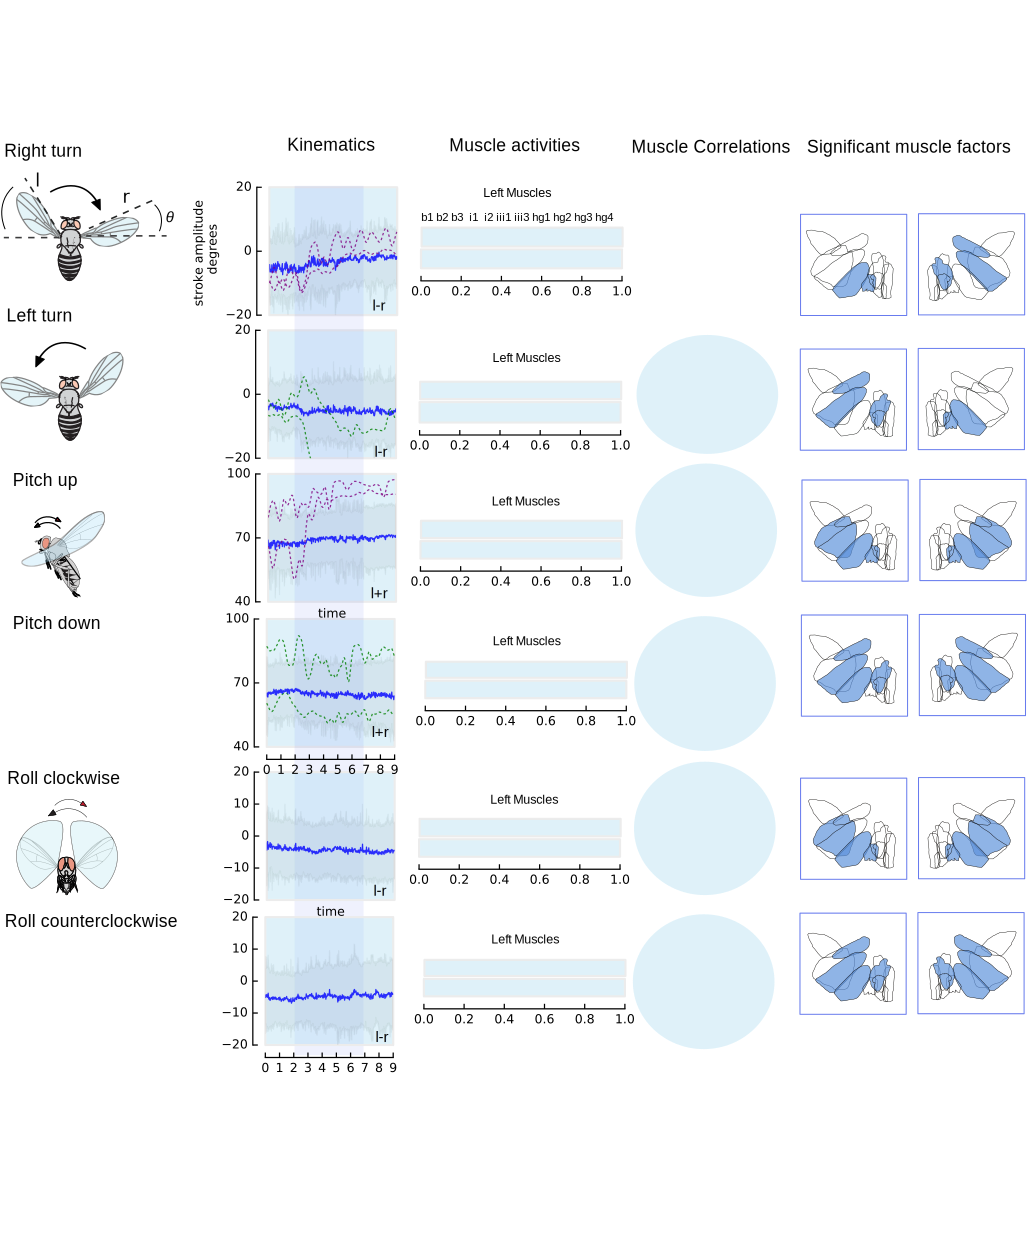

In [168]:
import numpy as np
import pandas as pd
import scipy

from scipy import signal

layout = fifi.FigureLayout('paper_figure_3_v2.svg',make_mplfigures = True)

filt_3 = smooth(rad_to_deg(yaw_4),window_len=35,window='hanning')
filt_5 = smooth(rad_to_deg(yaw_2),window_len=35,window='hanning')

layout.axes['l_turn_lmr'].plot(time, rad_to_deg(mean_WBA), color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].plot(time, filt_3[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].plot(time, filt_5[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA-error)), rad_to_deg((mean_WBA + error)), color = 'k', alpha = 0.05)
layout.axes['l_turn_lmr'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['l_turn_lmr'].set_yticks([-20,  0, 20])

filt = signal.savgol_filter(rad_to_deg(sameple_yaw_4), 15, 1)
filt_2 = smooth(rad_to_deg(sameple_yaw_4),window_len=35,window='hanning')
filt_4 = smooth(rad_to_deg(sameple_yaw_9),window_len=35,window='hanning')


layout.axes['r_turn_lmr'].plot(time, rad_to_deg(mean_WBA_yaw_right),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].plot(time, filt_2[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].plot(time, filt_4[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA_yaw_right-error_yaw_right)), rad_to_deg(mean_WBA_yaw_right + error_yaw_right),color = 'k',alpha = 0.05)
layout.axes['r_turn_lmr'].set_ybound(-20, 20)
layout.axes['r_turn_lmr'].set_ylabel('stroke amplitude \n degrees')
layout.axes['r_turn_lmr'].set_yticks([-20, 0, 20])

pu_filt_1 = smooth(rad_to_deg(pu_1),window_len=35,window='hanning')
pu_filt_2 = smooth(rad_to_deg(pu_9),window_len=35,window='hanning')


layout.axes['pitch_up'].plot(time, rad_to_deg(mean_WBA_pitch_up), color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].plot(time, pu_filt_1[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].plot(time, pu_filt_2[0:450],  color= 'purple', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_up'].fill_between(time, rad_to_deg(mean_WBA_pitch_up-error_pitch_up), rad_to_deg(mean_WBA_pitch_up + error_pitch_up),color = 'k',alpha = 0.05)
layout.axes['pitch_up'].set_ybound(40, 100)
layout.axes['pitch_up'].set_xlabel('time')
layout.axes['pitch_up'].set_yticks([40, 70, 100])

pd_filt_1 = smooth(rad_to_deg(pd_1),window_len=35,window='hanning')
pd_filt_2 = smooth(rad_to_deg(pd_9),window_len=35,window='hanning')

layout.axes['pitch_down'].plot(time, pd_filt_1[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].plot(time, pd_filt_2[0:450],  color= 'green', dashes=[2, 2], alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].plot(time, rad_to_deg(mean_WBA_pitch_down),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['pitch_down'].fill_between(time, rad_to_deg(mean_WBA_pitch_down-error_pitch_down), rad_to_deg(mean_WBA_pitch_down + error_pitch_down),color = 'k',alpha = 0.05)
layout.axes['pitch_down'].set_ybound(40, 100)
layout.axes['pitch_down'].set_yticks([40, 70, 100])



layout.axes['roll_cw'].plot(time, rad_to_deg(mean_WBA_roll_cw),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['roll_cw'].fill_between(time, rad_to_deg(mean_WBA_roll_cw-error_roll_cw), rad_to_deg(mean_WBA_roll_cw + error_roll_cw),color = 'k',alpha = 0.05)
#layout.axes['roll_cw'].set_ybound(25, 100)
layout.axes['roll_cw'].set_xlabel('time')
#layout.axes['roll_cw'].set_yticks([25, 50, 75, 100])
layout.axes['roll_cw'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['roll_cw'].set_yticks([-20, -10, 0, 10, 20])

layout.axes['roll_ccw'].plot(time, rad_to_deg(mean_WBA_roll_ccw),  color= 'b', alpha = 0.8) #,'o',alpha = 0.2)
layout.axes['roll_ccw'].fill_between(time, rad_to_deg(mean_WBA_roll_ccw-error_roll_ccw), rad_to_deg(mean_WBA_roll_ccw + error_roll_ccw),color = 'k',alpha = 0.05)
#layout.axes['roll_ccw'].set_ybound(25, 100)
#layout.axes['roll_ccw'].set_yticks([25, 50, 75, 100])
layout.axes['roll_ccw'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['roll_ccw'].set_yticks([-20, -10, 0, 10, 20])



fifi.mpl_functions.set_spines(layout)
layout.save('figure_4_new_1.svg')
plt.close('all')
display(SVG('figure_4_new_1.svg'))

In [189]:
yaw_left_a = yaw_left.loc[yaw_left['experimental_condition']== 'condition=test']
yaw_right_a = yaw_right.loc[yaw_right['experimental_condition']== 'condition=test']
pitch_up_a = pitch_up.loc[pitch_up['experimental_condition']== 'condition=test']
pitch_down_a = pitch_down.loc[pitch_down['experimental_condition']== 'condition=test']
roll_cw_a = roll_cw.loc[roll_cw['experimental_condition']== 'condition=test']
roll_ccw_a = roll_ccw.loc[roll_ccw['experimental_condition']== 'condition=test']




In [206]:
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd'),
            ('left', 'hg3'), ('right', 'hg3')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
    
for flynum in fly_nums:
    df=(left_turn_kine.loc[left_turn_kine['fly_num']==flynum])
    #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    average_activity = np.mean(state_mtrx,axis = 1)[:,None]
    #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
left_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
left_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)


left_turn_kine_means_activity_df


['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide


Muscles  \
0   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
1   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
2   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
3   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
4   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
5   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
6   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
7   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
8   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
9   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
10  [b1_right, b1_left, b2_right, b2_left, b3_righ...   
11  [b1_right, b1_left, b2_right, b2_left, b3_righ...   
12  [b1_right, b1_left, b2_right, b2_left, b3_righ...   

                              centered_standard_means   fly  
0   [[-3.46710612028e-15], [4.28037792627e-17], [2...  1389  
1   [[1.57898385724e-15], [-7.31011045021e-15], [-...  1390  
2   [[4.68489715886e-16], [1.24930590903e-15], [8....  1391  
3   [[2.62826797363e-14], [-9.59972841959e-15], [2...  1392  
4   [[1.7763568394e-15], [4.93722709774e-15], [1.0...  1393  
5   [[-3.98105504433e-15], [2.21729648039e-15], [-...  1394  
6   [[-6.39068022695e-15], [8.45083372117e-15], [1...  1395  
7   [[-5.70062939865e-16], [-8.14375628378e-16], [...  1396  
8   [[2.3234477291e-15], [-1.62101004356e-16], [-9...  1397  
9   [[3.23012057353e-15], [4.94363460022e-16], [9....  1398  
10  [[-1.06581410364e-15], [7.06101843662e-15], [-...  1399  
11  [[-2.77111666946e-15], [-9.71075072205e-16], [...  1400  
12  [[-2.70682946956e-15], [-4.81214127922e-15], [...  1401

In [205]:
y = yaw_right_a.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()
#normalize muscles here first


means_b1l = pd.DataFrame()
means_b2l = pd.DataFrame()
means_b3l =pd.DataFrame()
means_i1l = pd.DataFrame()
means_i2l = pd.DataFrame()    
means_iii1l = pd.DataFrame()    
means_iii3l = pd.DataFrame()    
means_hg1l = pd.DataFrame()   
means_hg2l = pd.DataFrame()    
#means_hg3l = []    
means_hg4l = pd.DataFrame()    

means_b1r = pd.DataFrame()
means_b2r = pd.DataFrame()    
means_b3r = pd.DataFrame()    
means_i1r = pd.DataFrame()   
means_i2r = pd.DataFrame()    
means_iii1r = pd.DataFrame()    
means_iii3r = pd.DataFrame()   
means_hg1r = pd.DataFrame()   
means_hg2r = pd.DataFrame()   
#means_hg3r = []    
means_hg4r = pd.DataFrame()  

counter = 0
yaw_right_a['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        yaw_right_a['trial'][0:trial_ind] = counter
    else: 
        yaw_right_a['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_yaw_right = pd.DataFrame()
dfe_yaw_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_right_a.loc[(yaw_right_a['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    b1l = d['b1_left']
    b2l = d['b2_left']    
    b3l = d['b3_left']    
    i1l = d['i1_left']    
    i2l = d['i2_left']    
    iii1l = d['iii1_left']    
    iii3l = d['iii3_left']    
    hg1l = d['hg1_left']    
    hg2l = d['hg2_left']    
    #hg3l = ['hg3_left']    
    hg4l = d['hg4_left']    

    b1r = d['b1_right']
    b2r = d['b2_right']    
    b3r = d['b3_right']    
    i1r = d['i1_right']    
    i2r = d['i2_right']    
    iii1r = d['iii1_right']    
    iii3r = d['iii3_right']    
    hg1r = d['hg1_right']    
    hg2r = d['hg2_right']    
    #hg3r = ['hg3_right']    
    hg4r = d['hg4_right']   
    
    b1l = b1l.tolist()
    b2l = b2l.tolist()    
    b3l = b3l.tolist()    
    i1l = i1l.tolist()    
    i2l = i2l.tolist()    
    iii1l = iii1l.tolist()   
    iii3l = iii3l.tolist()    
    hg1l = hg1l.tolist()    
    hg2l = hg2l.tolist()    
    #hg3l = ['hg3_left']    
    hg4l= hg4l.tolist()    

    b1r= b1r.tolist()
    b2r = b2r.tolist()    
    b3r = b3r.tolist()    
    i1r= i1r.tolist()    
    i2r= i2r.tolist()     
    iii1r= iii1r.tolist()     
    iii3r= iii3r.tolist()     
    hg1r= hg1r.tolist()     
    hg2r= hg2r.tolist()     
    #hg3r = ['hg3_right']    
    hg4r = hg4r.tolist()   
    
    
    
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_roll_ccw[counter] = ee
            means_b1l[counter]=b1l[0:450]
            means_b2l[counter]=b2l[0:450] 
            means_b3l[counter] = b3l[0:450]   
            means_i1l[counter]  = i1l[0:450]   
            means_i2l[counter]  =i2l[0:450]  
            means_iii1l[counter]  =iii1l[0:450]  
            means_iii3l[counter]  = iii3l[0:450]  
            means_hg1l[counter] = hg1l[0:450]   
            means_hg2l[counter]  = hg2l[0:450]  
            #means_hg3l[counter]    =hg3l[0:450]
            means_hg4l[counter]   =hg4l[0:450] 

            means_b1r[counter] = b1r[0:450]
            means_b2r[counter]   = b2r[0:450] 
            means_b3r[counter]    = b3r[0:450]
            means_i1r[counter]    = i1r[0:450]
            means_i2r[counter]    = i2r[0:450]
            means_iii1r[counter]    = iii1r[0:450]
            means_iii3r[counter]    = iii3r[0:450]
            means_hg1r[counter]    = hg1r[0:450]
            means_hg2r[counter]    = hg2r[0:450]
            #means_hg3r[counter]    = hg3[0:450]
            means_hg4r[counter]  = hg4r[0:450]
        if len(ee) >= 450:
            main_df_roll_ccw[counter] = ee[0:450]
            means_b1l[counter]=b1l[0:450]
            means_b2l[counter]=b2l[0:450] 
            means_b3l[counter] = b3l[0:450]   
            means_i1l[counter]  = i1l[0:450]   
            means_i2l[counter]  =i2l[0:450]  
            means_iii1l[counter]  =iii1l[0:450]  
            means_iii3l[counter]  = iii3l[0:450]  
            means_hg1l[counter] = hg1l[0:450]   
            means_hg2l[counter]  = hg2l[0:450]  
            #means_hg3l[counter]    =hg3l[0:450]
            means_hg4l[counter]   =hg4l[0:450] 

            means_b1r[counter] = b1r[0:450]
            means_b2r[counter]   = b2r[0:450] 
            means_b3r[counter]    = b3r[0:450]
            means_i1r[counter]    = i1r[0:450]
            means_i2r[counter]    = i2r[0:450]
            means_iii1r[counter]    = iii1r[0:450]
            means_iii3r[counter]    = iii3r[0:450]
            means_hg1r[counter]    = hg1r[0:450]
            means_hg2r[counter]    = hg2r[0:450]
            #means_hg3r[counter]    = hg3[0:450]
            means_hg4r[counter]  = hg4r[0:450]
            
        else:
            for i in range(450-len(ee)):
                ee.append(0)
                b1l.append(0)
                b2l.append(0)   
                b3l.append(0)    
                i1l.append(0)   
                i2l.append(0)    
                iii1l.append(0)   
                iii3l.append(0)    
                hg1l.append(0)   
                hg2l.append(0)    
                #hg3l.append(0)    
                hg4l.append(0)   

                b1r.append(0)
                b2r.append(0)  
                b3r.append(0)    
                i1r.append(0)    
                i2r.append(0)   
                iii1r.append(0)    
                iii3r.append(0)   
                hg1r.append(0)   
                hg2r.append(0)    
                #hg3r.append(0)    
                hg4r.append(0) 
            main_df_roll_ccw[counter] = ee
            means_b1l[counter]=b1l[0:450]
            means_b2l[counter]=b2l[0:450] 
            means_b3l[counter] = b3l[0:450]   
            means_i1l[counter]  = i1l[0:450]   
            means_i2l[counter]  =i2l[0:450]  
            means_iii1l[counter]  =iii1l[0:450]  
            means_iii3l[counter]  = iii3l[0:450]  
            means_hg1l[counter] = hg1l[0:450]   
            means_hg2l[counter]  = hg2l[0:450]  
            #means_hg3l[counter]    =hg3l[0:450]
            means_hg4l[counter]   =hg4l[0:450] 

            means_b1r[counter] = b1r[0:450]
            means_b2r[counter]   = b2r[0:450] 
            means_b3r[counter]    = b3r[0:450]
            means_i1r[counter]    = i1r[0:450]
            means_i2r[counter]    = i2r[0:450]
            means_iii1r[counter]    = iii1r[0:450]
            means_iii3r[counter]    = iii3r[0:450]
            means_hg1r[counter]    = hg1r[0:450]
            means_hg2r[counter]    = hg2r[0:450]
            #means_hg3r[counter]    = hg3[0:450]
            means_hg4r[counter]  = hg4r[0:450]
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)

yaw_right_ma = pd.DataFrame()


#*** add normalization in prior steps?
#yaw_right_ma[] 

np.median(means_b1l, axis =1)
np.median(means_b2l, axis = 1)
np.median(means_b3l,axis =1)
np.median(means_i1l, axis=1)
np.median(means_i2l, axis=1)
np.median(means_iii1l, axis=1)
np.median(means_iii3l, axis=1)
np.median(means_hg1l, axis=1)
np.median(means_hg2l, axis =1)
np.median(means_hg4l, axis =1)

np.median(means_b1r, axis =1)
np.median(means_b2r, axis = 1)
np.median(means_b3r,axis =1)
np.median(means_i1r, axis=1)
np.median(means_i2r, axis=1)
np.median(means_iii1r, axis=1)
np.median(means_iii3r, axis=1)
np.median(means_hg1r, axis=1)
np.median(means_hg2r, axis =1)
np.median(means_hg4r, axis =1)

yaw_right_ma['b1l']=pd.Series(means_b1l)
yaw_right_ma['b2l']=pd.Series(means_b2l)
yaw_right_ma['b3l']=pd.Series(means_b3l)
yaw_right_ma['i1l']=pd.Series(means_i1l)
yaw_right_ma['i2l']=pd.Series(means_i2l)
yaw_right_ma['iii1l']=pd.Series(means_iii1l)
yaw_right_ma['iii3l']=pd.Series(means_iii3l)
yaw_right_ma['hg1l']=pd.Series(means_hg1l)
yaw_right_ma['hg2l']=pd.Series(means_hg2l)
yaw_right_ma['hg4l']=pd.Series(means_hg4l)

yaw_right_ma['b1r']=pd.Series(means_b1r)
yaw_right_ma['b2r']=pd.Series(means_b2r)
yaw_right_ma['b3r']=pd.Series(means_b3r)
yaw_right_ma['i1r']=pd.Series(means_i1r)
yaw_right_ma['i2r']=pd.Series(means_i2r)
yaw_right_ma['iii1r']=pd.Series(means_iii1r)
yaw_right_ma['iii3r']=pd.Series(means_iii3r)
yaw_right_ma['hg1r']=pd.Series(means_hg1r)
yaw_right_ma['hg2r']=pd.Series(means_hg2r)
yaw_right_ma['hg4r']=pd.Series(means_hg4r)

mean_WBA_roll_ccw = np.mean(main_df_roll_ccw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_ccw = main_df_roll_ccw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


TypeError: 'numpy.int64' object is not iterable

In [ ]:
yaw_right_ma

In [197]:
type(b1l)

list

In [198]:
len(b1l)

450

In [200]:
#b1l[0:450]

In [ ]:
yaw_right_ma

In [169]:
yaw_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
yaw_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_up = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_down = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_cw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_ccw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']



In [170]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [77]:
fly.experimental_block[11393]

'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'

In [78]:
type( fly.experimental_block)

h5py._hl.dataset.Dataset

In [29]:

fly = flylist[1]
#snum = 5
snum = 3

#df.loc[df['Value'].idxmax()]

l = fly.block_data['left', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
r = fly.block_data['right', 'amp', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
x = fly.block_data['common', 'x_pos', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
times = np.arange(len(x))*0.02

b2 = fly.normed_signals['left', 'b2']

#x = b2

#Normalized Data
normalized = (x-min(x))/(max(x)-min(x))

def normd (muscle_data):
    x = muscle_data
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized

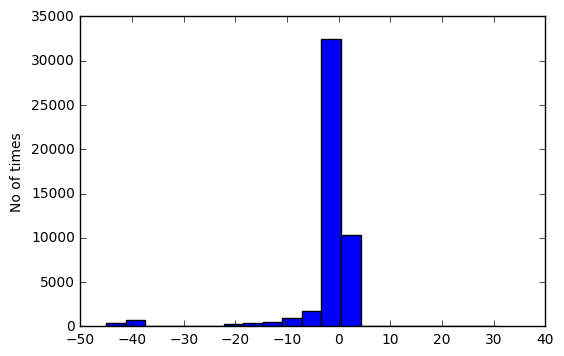

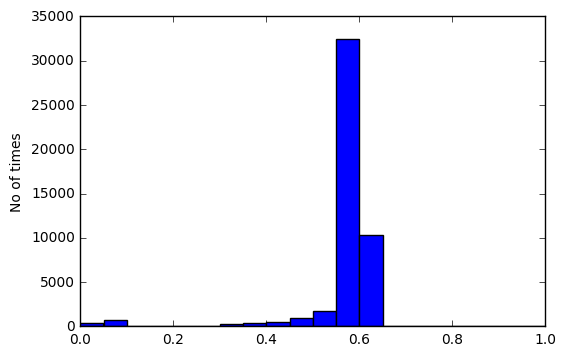

In [30]:
b1 = fly.normed_signals['left', 'b1']
np.mean(fly.normed_signals['left', 'b1'])

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(b1, bins=20)
plt.ylabel('No of times')
plt.show()

b1_norm = normd(fly.normed_signals['left', 'b1'])

plt.hist(b1_norm, bins=20)
plt.ylabel('No of times')
plt.show()

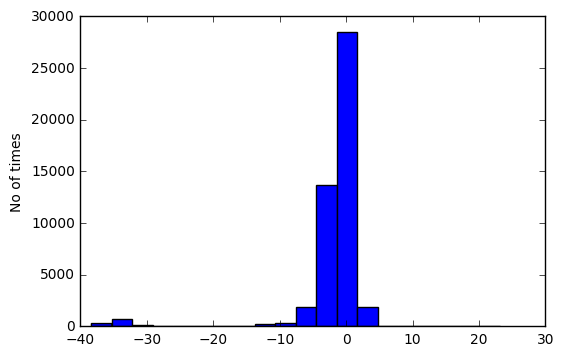

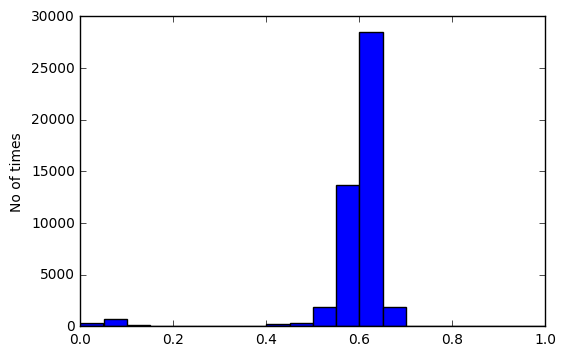

In [31]:
b1 = fly.normed_signals['right', 'b1']
np.mean(fly.normed_signals['right', 'b1'])

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.hist(b1, bins=20)
plt.ylabel('No of times')
plt.show()

b1_norm = normd(fly.normed_signals['right', 'b1'])

plt.hist(b1_norm, bins=20)
plt.ylabel('No of times')
plt.show()

In [186]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
#fly = flb.NetFly(1556)
fly = flylist[1]
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [188]:
yaw_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
yaw_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_up = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
pitch_down = multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_cw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']
roll_ccw = multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0']



In [ ]:
y = yaw_right.index.tolist()
#y_der = (np.asarray(y)).diff()

slope = np.gradient(np.asarray(y))
slope = slope.flatten()
new_trial_inds =np.argwhere(slope>1.)
new_trial_inds
new_trial_inds_shifted = new_trial_inds -1
len(new_trial_inds)

new_trial_inds = new_trial_inds.flatten()
new_trial_inds_shifted = new_trial_inds_shifted.flatten()


means_b1l = []
means_b2l = []    
means_b3l = []    
means_i1l = []    
means_i2l = []    
means_iii1l = []    
means_iii3l = []    
means_hg1l = []    
means_hg2l = []    
means_hg3l = []    
means_hg4l = []    

means_b1r = []
means_b2r = []    
means_b3r = []    
means_i1r = []    
means_i2r = []    
means_iii1r = []    
means_iii3r = []    
means_hg1r = []    
means_hg2r = []    
means_hg3r = []    
means_hg4r = []   

counter = 0
yaw_right['trial'] = ""
for trial_ind in new_trial_inds_shifted: 
    if counter == 0:
        yaw_right['trial'][0:trial_ind] = counter
    else: 
        yaw_right['trial'][new_trial_inds_shifted[counter-1]: trial_ind] = counter
    counter += 1

#d = pd.DataFrame()
main_df_yaw_right = pd.DataFrame()
dfe_yaw_right= pd.DataFrame()
counter = 0
for trial_in in new_trial_inds: 
    d = yaw_right.loc[(yaw_right['trial']==counter)] #, ignore_index=True
    #print(d)
    #d = d.reset_index(drop=True)
    e = d['amp_diff']
    b1l = d['b1_left']
    b2l = ['b2_left']    
    b3l = ['b3_left']    
    i1l = ['i1_left']    
    i2l = ['i2_left']    
    iii1l = ['iii1_left']    
    iii3l = ['iii3_left']    
    hg1l = ['hg1_left']    
    hg2l = ['hg2_left']    
    hg3l = ['hg3_left']    
    hg4l = ['hg4_left']    

    b1r = ['b1_right']
    b2r = ['b2_right']    
    b3r = ['b3_right']    
    i1r = ['i1_right']    
    i2r = ['i2_right']    
    iii1r = ['iii1_right']    
    iii3r = ['iii3_right']    
    hg1r = ['hg1_right']    
    hg2r = ['hg2_right']    
    hg3r = ['hg3_right']    
    hg4r = ['hg4_right']   
    
    #e = e.reset_index()
    #e = pd.Series(e)
    ee = e.tolist()
    #print(len(ee)) ##should be 550
    
    #ee = pd.Series(ee)
    if len(ee)> 2:
        if len(ee) == 450:
            main_df_roll_ccw[counter] = ee
            means_b1l[counter]=b1l[0:450]
            means_b2l[counter]=b2l[0:450] 
            means_b3l[counter] = b3l[0:450]   
            means_i1l[counter]  = i1l[0:450]   
            means_i2l[counter]  =i2l[0:450]  
            means_iii1l[counter]  =iii1l[0:450]  
            means_iii3l[counter]  = iii3l[0:450]  
            means_hg1l[counter] = hg1l[0:450]   
            means_hg2l[counter]  = hg2l[0:450]  
            means_hg3l[counter]    =hg3l[0:450]
            means_hg4l[counter]   =hg4l[0:450] 

            means_b1r[counter] = b1r[0:450]
            means_b2r[counter]   = b2r[0:450] 
            means_b3r[counter]    = b3r[0:450]
            means_i1r[counter]    = i1l[0:450]
            means_i2r[counter]    = i2l[0:450]
            means_iii1r[counter]    = iii1l[0:450]
            means_iii3r[counter]    = iii3l[0:450]
            means_hg1r[counter]    = hg1[0:450]
            means_hg2r[counter]    = hg2[0:450]
            means_hg3r[counter]    = hg3[0:450]
            means_hg4r[counter]  = hg4[0:450]
        if len(ee) >= 450:
            main_df_roll_ccw[counter] = ee[0:450]
            means_b1l[counter]=b1l[0:450]
            means_b2l[counter]=b2l[0:450] 
            means_b3l[counter] = b3l[0:450]   
            means_i1l[counter]  = i1l[0:450]   
            means_i2l[counter]  =i2l[0:450]  
            means_iii1l[counter]  =iii1l[0:450]  
            means_iii3l[counter]  = iii3l[0:450]  
            means_hg1l[counter] = hg1l[0:450]   
            means_hg2l[counter]  = hg2l[0:450]  
            means_hg3l[counter]    =hg3l[0:450]
            means_hg4l[counter]   =hg4l[0:450] 

            means_b1r[counter] = b1r[0:450]
            means_b2r[counter]   = b2r[0:450] 
            means_b3r[counter]    = b3r[0:450]
            means_i1r[counter]    = i1l[0:450]
            means_i2r[counter]    = i2l[0:450]
            means_iii1r[counter]    = iii1l[0:450]
            means_iii3r[counter]    = iii3l[0:450]
            means_hg1r[counter]    = hg1[0:450]
            means_hg2r[counter]    = hg2[0:450]
            means_hg3r[counter]    = hg3[0:450]
            means_hg4r[counter]  = hg4[0:450]
            
        else:
            for i in range(450-len(ee)):
                ee.append(0)
                b1l.append(0)
                b2l.append(0)   
                b3l.append(0)    
                i1l.append(0)   
                i2l.append(0)    
                iii1l.append(0)   
                iii3l.append(0)    
                hg1l.append(0)   
                hg2l.append(0)    
                hg3l.append(0)    
                hg4l.append(0)   

                b1r.append(0)
                b2r.append(0)  
                b3r.append(0)    
                i1r.append(0)    
                i2r.append(0)   
                iii1r.append(0)    
                iii3r.append(0)   
                hg1r.append(0)   
                hg2r.append(0)    
                hg3r.append(0)    
                hg4r.append(0) 
            main_df_roll_ccw[counter] = ee
            means_b1l[counter]=b1l[0:450]
            means_b2l[counter]=b2l[0:450] 
            means_b3l[counter] = b3l[0:450]   
            means_i1l[counter]  = i1l[0:450]   
            means_i2l[counter]  =i2l[0:450]  
            means_iii1l[counter]  =iii1l[0:450]  
            means_iii3l[counter]  = iii3l[0:450]  
            means_hg1l[counter] = hg1l[0:450]   
            means_hg2l[counter]  = hg2l[0:450]  
            means_hg3l[counter]    =hg3l[0:450]
            means_hg4l[counter]   =hg4l[0:450] 

            means_b1r[counter] = b1r[0:450]
            means_b2r[counter]   = b2r[0:450] 
            means_b3r[counter]    = b3r[0:450]
            means_i1r[counter]    = i1l[0:450]
            means_i2r[counter]    = i2l[0:450]
            means_iii1r[counter]    = iii1l[0:450]
            means_iii3r[counter]    = iii3l[0:450]
            means_hg1r[counter]    = hg1[0:450]
            means_hg2r[counter]    = hg2[0:450]
            means_hg3r[counter]    = hg3[0:450]
            means_hg4r[counter]  = hg4[0:450]
        #dfe = pd.concat([dfe, ee], ignore_index=True)#, ignore_index=True, axis=1)#d['amp_diff'] #, ignore_index=True
        
        
    counter +=1

    
    
#df_big_force['impact force (mN)'].iloc[3]
#df.loc[42, :]
#df.loc[date & trial & ID, :].iloc[0]

from scipy import stats

#stats.sem(main_df, axis =1)

yaw_right_ma = pd.DataFrame()


*** add normalization in prior steps?
yaw_right_ma[] np.median(means_b1l, axis =1)
means_b2l
means_b3l
means_i1l[counter]  = i1l[0:450]
means_i2l[counter]  =i2l[0:450]  
means_iii1l[counter]  =iii1l[0:450]  
means_iii3l[counter]  = iii3l[0:450]  
means_hg1l[counter] = hg1l[0:450]   
means_hg2l[counter]  = hg2l[0:450]  
means_hg3l[counter]    =hg3l[0:450]
means_hg4l[counter]   =hg4l[0:450] 

means_b1r[counter] = b1r[0:450]
means_b2r[counter]   = b2r[0:450] 
means_b3r[counter]    = b3r[0:450]
means_i1r[counter]    = i1l[0:450]
means_i2r[counter]    = i2l[0:450]
means_iii1r[counter]    = iii1l[0:450]
means_iii3r[counter]    = iii3l[0:450]
means_hg1r[counter]    = hg1[0:450]
means_hg2r[counter]    = hg2[0:450]
means_hg3r[counter]    = hg3[0:450]
means_hg4r[counter]

mean_WBA_roll_ccw = np.mean(main_df_roll_ccw, axis =1)  #mean
#error = main_df.stack().std()  
error_roll_ccw = main_df_roll_ccw.std(axis = 1, skipna = True)
#print(error)
inds = np.arange(0, 450)
time =inds/50

In [89]:
cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
repeats = np.arange(3)

#[snum]  # just ignore snum
    
per_fly_means_b1l = []
per_fly_means_b2l = []    
per_fly_means_b3l = []    
per_fly_means_i1l = []    
per_fly_means_i2l = []    
per_fly_means_iii1l = []    
per_fly_means_iii3l = []    
per_fly_means_hg1l = []    
per_fly_means_hg2l = []    
per_fly_means_hg3l = []    
per_fly_means_hg4l = []    

per_fly_means_b1r = []
per_fly_means_b2r = []    
per_fly_means_b3r = []    
per_fly_means_i1r = []    
per_fly_means_i2r = []    
per_fly_means_iii1r = []    
per_fly_means_iii3r = []    
per_fly_means_hg1r = []    
per_fly_means_hg2r = []    
per_fly_means_hg3r = []    
per_fly_means_hg4r = []   
  
muscle_activity_dict={}
fly_activity_dict = {}
    
for fly in flylist:
    
    for snum in repeats: 
        #idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
        #snum =3
        idxs_right_turn = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=8, b_y=0'][snum]
        idxs_left_turn = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=-8, b_y=0'][snum]
        idxs_WSA_increase = fly.block_data['common','idx', 'ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'][snum]
        #idxs_WSA_increase = fly.block_data['ol_blocks, g_x=0, g_y=4 b_x=0, b_y=0'][snum]
        idxs_WSA_decrease = fly.block_data['common','idx', 'ol_blocks, g_x=0, g_y=-4 b_x=0, b_y=0'][snum]
#print(idxs)    
        print(snum)
        print(len(idxs))
        print(fly)
        idxs = idxs_WSA_decrease
        #idxs = idxs_WSA_increase
        #idxs = idxs_right_turn
        #idxs = idxs_left_turn
    
        b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
        b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

        b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
        b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

        b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
        b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

        i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
        i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

        i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
        i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

        iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
        iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

        iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
        iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

        hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
        hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

        hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
        hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

        hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
        hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

        hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
        hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]
    
        #df=(right_turn_kine.loc[right_turn_kine['fly_num']==flynum])
        #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
        #muscle_matrix_l = np.vstack([b1l, b2l, b3l, i1l, i2l, iii1l, iii3l, hg1l, hg2l, hg3l, hg4l])
        #muscle_matrix_r = np.vstack([b1r, b2r, b3r, i1r, i2r, iii1r, iii3r, hg1r, hg2r, hg3r, hg4r])
        
        print(len(b1l))
        
        av_b1l = np.mean(b1l[105:280])
        av_b1r = np.mean(b1r[105:280])
        
        av_b2l = np.mean(b2l[105:280])
        av_b2r = np.mean(b2r[105:280])

        av_b3l = np.mean(b3l[105:280])
        av_b3r = np.mean(b3r[105:280])

        av_i1l = np.mean(i1l[105:280])
        av_i1r = np.mean(i1r[105:280])

        av_i2l = np.mean(i2l[105:280])
        av_i2r = np.mean(i2r[105:280])

        av_iii1l = np.mean(iii1l[105:280])
        av_iii1r = np.mean(iii1r[105:280])

        av_iii3l = np.mean(iii3l[105:280])
        av_iii3r = np.mean(iii3l[105:280])

        av_hg1l = np.mean(hg1l[105:280])
        av_hg1r = np.mean(hg1r[105:280])

        av_hg2l = np.mean(hg2l[105:280])
        av_hg2r = np.mean(hg2r[105:280])

        av_hg3l = np.mean(hg3l[105:280])
        av_hg3r = np.mean(hg3r[105:280])

        av_hg4l = np.mean(hg4l[105:280])
        av_hg4r = np.mean(hg4r[105:280])
        
        #state_mtrx = np.vstack([df[key] for key in sorted_keys])
        #average_activity = np.mean(state_mtrx,axis = 1)[:,None]
        #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
        #centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
        b1l_mean = np.mean(b1l)
        b2l_mean = np.mean(b2l)
        b3l_mean = np.mean(b3l)
        
        i1l_mean = np.mean(i1l)
        i2l_mean = np.mean(i2l)
        
        iii1l_mean = np.mean(iii1l)
        iii3l_mean = np.mean(iii3l)
        
        hg1l_mean = np.mean(hg1l)
        hg2l_mean = np.mean(hg2l)
        hg3l_mean = np.mean(hg3l)
        hg4l_mean = np.mean(hg4l)
        
        b1r_mean = np.mean(b1r)
        b2r_mean = np.mean(b2r)
        b3r_mean = np.mean(b3r)
        
        i1r_mean = np.mean(i1r)
        i2r_mean = np.mean(i2r)
        
        iii1r_mean = np.mean(iii1r)
        iii3r_mean = np.mean(iii3r)
        
        hg1r_mean = np.mean(hg1r)
        hg2r_mean = np.mean(hg2r)
        hg3r_mean = np.mean(hg3r)
        hg4r_mean = np.mean(hg4r)
        
        per_fly_means_b1l.append(b1l_mean)
        per_fly_means_b2l.append(b2l_mean) 
        per_fly_means_b3l.append(b3l_mean)   
        per_fly_means_i1l.append(i1l_mean)    
        per_fly_means_i2l.append(i2l_mean)   
        per_fly_means_iii1l.append(iii1l_mean)   
        per_fly_means_iii3l.append(iii3l_mean)  
        per_fly_means_hg1l.append(hg1l_mean)   
        per_fly_means_hg2l.append(hg2l_mean)  
        per_fly_means_hg3l.append(hg3l_mean)   
        per_fly_means_hg4l.append(hg4l_mean) 
        
        per_fly_means_b1r.append(b1r_mean)
        per_fly_means_b2r.append(b2r_mean) 
        per_fly_means_b3r.append(b3r_mean)   
        per_fly_means_i1r.append(i1r_mean)    
        per_fly_means_i2r.append(i2r_mean)   
        per_fly_means_iii1r.append(iii1r_mean)   
        per_fly_means_iii3r.append(iii3r_mean)  
        per_fly_means_hg1r.append(hg1r_mean)   
        per_fly_means_hg2r.append(hg2r_mean)  
        per_fly_means_hg3r.append(hg3r_mean)   
        per_fly_means_hg4r.append(hg4r_mean) 
        
    #centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    #std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    #centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    #fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
    #    centered_std_mean})
    #fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
    #    centered_mean})
    #if i ==0:
    #    st_mtx = state_mtrx
    #    std_matrx_tosave = std_mtrx
    #    
    i += 1
    
#right_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
#right_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)

#then maybe truncate list

0
395
395
1
395
395
2
395
395
0
395
395
1
395
395
2
395
395
0
395


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide


395
1
395
395
2
395
395
0
395
395
1
395
395
2
395
395
0
395
395
1
395
395
2
395
395
0
395
395
1
395
395
2
395
395
0
395
395
1
395
395
2
395
395
0
395
395


IndexError: index 1 is out of bounds for axis 0 with size 1

In [90]:
b1l_mom = np.mean(per_fly_means_b1l)
b2l_mom = np.mean(per_fly_means_b2l)
b3l_mom = np.mean(per_fly_means_b3l)
i1l_mom = np.mean(per_fly_means_i1l )
i2l_mom = np.mean(per_fly_means_i2l )
iii1l_mom = np.mean(per_fly_means_iii1l) 
iii3l_mom = np.mean(per_fly_means_iii3l ) 
hg1l_mom = np.mean(per_fly_means_hg1l)
hg2l_mom = np.mean(per_fly_means_hg2l)
hg3l_mom = np.mean(per_fly_means_hg3l)
hg4l_mom = np.mean(per_fly_means_hg4l)
        
b1r_mom = np.mean(per_fly_means_b1r)
b2r_mom = np.mean(per_fly_means_b2r)
b3r_mom = np.mean(per_fly_means_b3r)
i1r_mom = np.mean(per_fly_means_i1r )
i2r_mom = np.mean(per_fly_means_i2r  )
iii1r_mom = np.mean(per_fly_means_iii1r)
iii3r_mom = np.mean(per_fly_means_iii3r ) 
hg1r_mom = np.mean(per_fly_means_hg1r)
hg2r_mom = np.mean(per_fly_means_hg2r )
hg3r_mom = np.mean(per_fly_means_hg3r  ) 
hg4r_mom = np.mean(per_fly_means_hg4r )

In [91]:
### do a nicer job organizing this dataframe

b = 'basalare'
i = 'first_axillary'
iii = 'third_axillary'
h = 'hgs'


muscles = ['b1', 'b2', 'b3', 'i1', 'i2', 'iii1', 'iii3', 'hg1', 'hg2', 'hg3', 'hg4']


#wing_list = ['right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left']
#sclerite_group = [b, b, b, b, b, b, h, h, h, h, h, h, h, h, i, i, i, i, iii, iii, iii, iii]
#muscle_number = [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 1, 1, 3, 3]
#muscle_number_landr = [1, -1, 2, -2, 3, -3, 1, -1, 2, -2, 3, -3, 4, -4, 1, -1, 2, -2, 1, -1, 3, -3]
#sclerite_group_number = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
#muscles = list(muscles)

right_muscles = [b1r_mom, b2r_mom, b3r_mom, i1r_mom, i2r_mom, iii1r_mom, iii3r_mom, hg1r_mom, hg2r_mom, hg3r_mom, hg4r_mom]
left_muscles = [b1l_mom, b2l_mom, b3l_mom, i1l_mom, i2l_mom, iii1l_mom, iii3l_mom, hg1l_mom, hg2l_mom, hg3l_mom, hg4l_mom]

d_activity_matrix = {'averages_left_muscle_activity': left_muscles,'averages_right_muscle_activity': right_muscles, 'muscles': muscles  }

#right_turn_activity_matrix = pd.DataFrame(d_activity_matrix)
#left_turn_activity_matrix = pd.DataFrame(d_activity_matrix)
#WSA_increase_matrix = pd.DataFrame(d_activity_matrix)
WSA_decrease_matrix = pd.DataFrame(d_activity_matrix)
#activity_matrix.head(d_activity_matrix)
WSA_decrease_matrix

#left_turn_activity_matrix
#right_turn_activity_matrix

averages_left_muscle_activity  averages_right_muscle_activity muscles
0                        0.672735                        0.685643      b1
1                        0.221269                        0.252802      b2
2                        0.631187                        0.715756      b3
3                        0.277186                        0.270375      i1
4                        0.259461                        0.388662      i2
5                        0.177332                        0.140087    iii1
6                        0.614335                        0.557641    iii3
7                        0.241578                        0.336001     hg1
8                        0.326495                        0.315684     hg2
9                        0.019693                             NaN     hg3
10                       0.161258                        0.630789     hg4

In [82]:
right_turn_activity_matrix.to_csv('right_turn_activity_matrix.csv', index=False)

In [76]:
left_turn_activity_matrix.to_csv('left_turn_activity_matrix.csv', index=False)

In [92]:
WSA_decrease_matrix.to_csv('WSA_decrease_matrix.csv', index=False)

In [87]:
WSA_increase_matrix.to_csv('WSA_increase_matrix.csv', index=False)

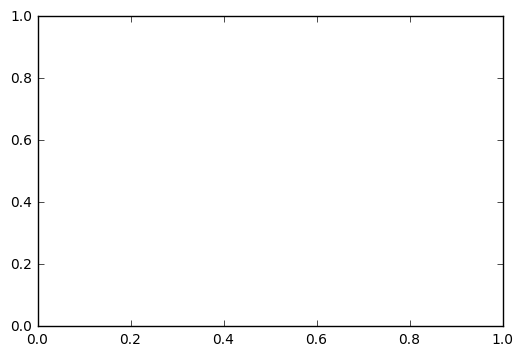

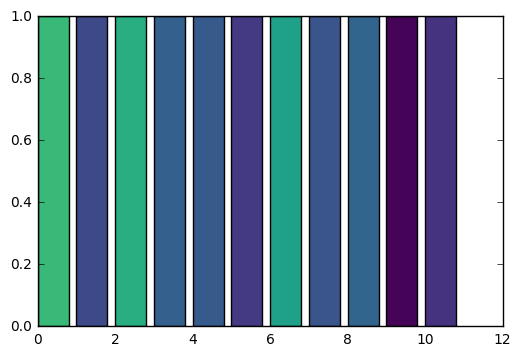

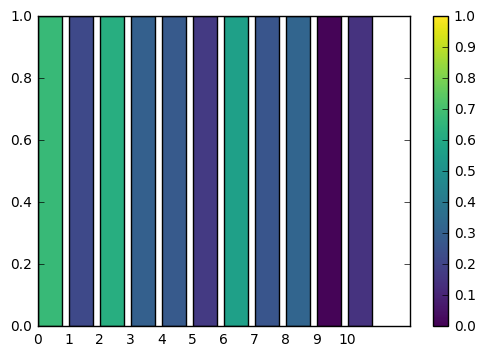

In [75]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

Min = 0.
Max = 1.

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(activity_matrix['averages_left_muscle_activity'])#*(10^100))
df_1= pd.DataFrame({"x":x,"y":y,"c":c_r})


#cmap = plt.cm.RdBu
cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df_1.x, df_1.y, color=cmap(norm(df_1.c.values)))
ax.set_xticks(df_1.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

/usr/lib/python2.7/dist-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


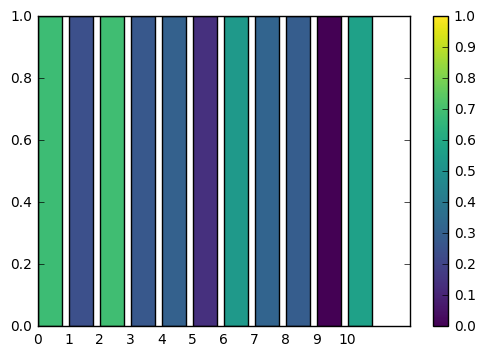

In [76]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

Min = 0.
Max = 1.

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(activity_matrix['averages_right_muscle_activity'])#*(10^100))
df_1= pd.DataFrame({"x":x,"y":y,"c":c_r})


#cmap = plt.cm.RdBu
cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df_1.x, df_1.y, color=cmap(norm(df_1.c.values)))
ax.set_xticks(df_1.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(left_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_rw_rt = pd.DataFrame({"x":x,"y":y,"c":c_r})


cmap = plt.cm.RdBu
#cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df_rw_rt.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

WSA_increase_kine
left_turn_kine 
right_turn_kine
WSA_decrease_kine 

In [117]:
cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
repeats = np.arange(6)

idxs = fly.block_data['common','idx', 'cl_blocks, g_x=-1, g_y=0 b_x=0, b_y=0'][snum]
    
for fly in flylist:
    for snum in repeats: 
        
    
        b1l = normd(fly.normed_signals['left', 'b1'])[idxs]
        b1r = normd(fly.normed_signals['right', 'b1'])[idxs]

        b2l = normd(fly.normed_signals['left', 'b2'])[idxs]
        b2r = normd(fly.normed_signals['right', 'b2'])[idxs]

        b3l = normd(fly.normed_signals['left', 'b3'])[idxs]
        b3r = normd(fly.normed_signals['right', 'b3'])[idxs]

        i1l = normd(fly.normed_signals['left', 'i1'])[idxs]
        i1r = normd(fly.normed_signals['right', 'i1'])[idxs]

        i2l = normd(fly.normed_signals['left', 'i2'])[idxs]
        i2r = normd(fly.normed_signals['right', 'i2'])[idxs]

        iii1l = normd(fly.normed_signals['left', 'iii1'])[idxs]
        iii1r = normd(fly.normed_signals['right', 'iii1'])[idxs]

        iii3l = normd(fly.normed_signals['left', 'iii3'])[idxs]
        iii3r = normd(fly.normed_signals['right', 'iii3'])[idxs]

        hg1l = normd(fly.normed_signals['left', 'hg1'])[idxs]
        hg1r = normd(fly.normed_signals['right', 'hg1'])[idxs]

        hg2l = normd(fly.normed_signals['left', 'hg2'])[idxs]
        hg2r = normd(fly.normed_signals['right', 'hg2'])[idxs]

        hg3l = normd(fly.normed_signals['left', 'hg3'])[idxs]
        hg3r = normd(fly.normed_signals['right', 'hg3'])[idxs]

        hg4l = normd(fly.normed_signals['left', 'hg4'])[idxs]
        hg4r = normd(fly.normed_signals['right', 'hg4'])[idxs]
    
        #df=(right_turn_kine.loc[right_turn_kine['fly_num']==flynum])
        #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
        muscle_matrix_l = np.vstack([b1l, b2l, b3l, i1l, i2l, iii1l, iii3l, hg1l, hg2l, hg3l, hg4l])
        muscle_matrix_r = np.vstack([b1r, b2r, b3r, i1r, i2r, iii1r, iii3r, hg1r, hg2r, hg3r, hg4r])
        
        ### make dataframes here then average 
        
        #state_mtrx = np.vstack([df[key] for key in sorted_keys])
        #average_activity = np.mean(state_mtrx,axis = 1)[:,None]
        #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
        #centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
right_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
right_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


In [119]:
right_turn_kine_means_activity_df

Muscles  \
0   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
1   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
2   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
3   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
4   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
5   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
6   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
7   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
8   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
9   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
10  [b1_right, b1_left, b2_right, b2_left, b3_righ...   
11  [b1_right, b1_left, b2_right, b2_left, b3_righ...   
12  [b1_right, b1_left, b2_right, b2_left, b3_righ...   

                              centered_standard_means   fly  
0   [[-9.02276489854e-16], [-5.33309853824e-15], [...  1389  
1   [[4.30984938084e-15], [4.73573821324e-15], [3....  1390  
2   [[-3.28846224815e-15], [-2.46634668611e-15], [...  1391  
3   [[-1.11844689888e-14], [8.77213254025e-16], [2...  1392  
4   [[-7.31441051518e-15], [-3.04633141237e-15], [...  1393  
5   [[2.9067657372e-15], [5.70587348413e-15], [6.1...  1394  
6   [[-7.19891982283e-15], [5.46930921605e-15], [6...  1395  
7   [[nan], [nan], [nan], [nan], [nan], [nan], [na...  1396  
8   [[-3.3923481308e-15], [-9.17475971739e-15], [-...  1397  
9   [[-1.45503631896e-15], [-2.32805811034e-15], [...  1398  
10  [[-9.07075832885e-16], [1.58738270755e-15], [-...  1399  
11  [[2.23712918594e-15], [5.91059699693e-16], [1....  1400  
12  [[-2.1834386151e-15], [1.85037170771e-17], [-9...  1401

In [130]:
#right_turn_kine_means_activity_df.fillna(0, inplace = True)
right_turn_kine_means_activity_df_dropna = right_turn_kine_means_activity_df.drop(7, axis=0)

In [131]:
### do a nicer job organizing this dataframe

mean_of_means = np.mean(right_turn_kine_means_activity_df_dropna ['centered_standard_means'])

muscles = right_turn_kine_means_activity_df_dropna ['Muscles'][0]

#d= pd.DataFrame()

b = 'basalare'
i = 'first_axillary'
iii = 'third_axillary'
h = 'hgs'

#d = pd.DataFrame(mean_of_means)
#d['averages_muscle_activity']= mean_of_means

averages_muscle = pd.Series(mean_of_means.flatten())

print(muscles)

wing_list = ['right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left']
sclerite_group = [b, b, b, b, b, b, h, h, h, h, h, h, h, h, i, i, i, i, iii, iii, iii, iii]
muscle_number = [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 1, 1, 3, 3]
muscle_number_landr = [1, -1, 2, -2, 3, -3, 1, -1, 2, -2, 3, -3, 4, -4, 1, -1, 2, -2, 1, -1, 3, -3]
sclerite_group_number = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
muscles = list(muscles)

d = {'averages_muscle_activity': averages_muscle, 'wing_list': wing_list, 'sclerite_group': sclerite_group, 'muscle_number': muscle_number, 'muscles': muscles , 'sclerite_group_number': sclerite_group_number, 'muscle_number_landr': muscle_number_landr  }

right_turn_kine_new_df = pd.DataFrame(d)
right_turn_kine_new_df.head()

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


averages_muscle_activity  muscle_number  muscle_number_landr   muscles  \
0             -2.364391e-15              1                    1  b1_right   
1             -2.802928e-16              1                   -1   b1_left   
2             -1.979838e-16              2                    2  b2_right   
3             -7.095839e-16              2                   -2   b2_left   
4              4.873360e-16              3                    3  b3_right   

  sclerite_group  sclerite_group_number wing_list  
0       basalare                      1     right  
1       basalare                      1      left  
2       basalare                      1     right  
3       basalare                      1      left  
4       basalare                      1     right

In [132]:
right_turn_kine_new_df.to_csv('right_turn_kine_new_df.csv')

In [176]:
right_muscles_right_turn = right_turn_kine_new_df.loc[(right_turn_kine_new_df['wing_list'] == 'right')]

left_muscles_right_turn = right_turn_kine_new_df.loc[(right_turn_kine_new_df['wing_list'] == 'left')]


In [200]:
right_muscles_right_turn

averages_muscle_activity  muscle_number  muscle_number_landr     muscles  \
0              -2.364391e-15              1                    1    b1_right   
2              -1.979838e-16              2                    2    b2_right   
4               4.873360e-16              3                    3    b3_right   
6              -3.415459e-16              1                    1   hg1_right   
8               7.685733e-17              2                    2   hg2_right   
10                       NaN              3                    3   hg3_right   
12              9.762006e-17              4                    4   hg4_right   
14              7.366647e-16              1                    1    i1_right   
16              1.977823e-16              2                    2    i2_right   
18             -3.951645e-16              1                    1  iii1_right   
20              2.740372e-16              3                    3  iii3_right   

    sclerite_group  sclerite_group_number wing_list  
0         basalare                      1     right  
2         basalare                      1     right  
4         basalare                      1     right  
6              hgs                      2     right  
8              hgs                      2     right  
10             hgs                      2     right  
12             hgs                      2     right  
14  first_axillary                      3     right  
16  first_axillary                      3     right  
18  third_axillary                      4     right  
20  third_axillary                      4     right

In [138]:
colours = ['#bf8046', '#df9f24', '#e0de30', '#c1de2d', '#1ebf82',
           '#23de27', '#1dbe20', '#11807f', '#24607f', '#22427e']

#min = pitch_down_new_df['averages_muscle_activity'].min
#max = pitch_down_new_df['averages_muscle_activity'].max
max = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
min = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]
print(min)
#min= min['averages_muscle_activity']
#max= min['averages_muscle_activity']
levels = range(int(min['averages_muscle_activity']), int(max['averages_muscle_activity']))

#plt.contourf(vals, levels=levels, colors=colours)
vals = right_turn_kine_new_df['averages_muscle_activity']


#viridisBig = cm.get_cmap('viridis', 512)
#newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
#plot_examples([viridis, newcmp])

#min= int(min['averages_muscle_activity'])
#max= int(max['averages_muscle_activity'])

Min = min['averages_muscle_activity']
Max =max['averages_muscle_activity']

print(Min*(10^1600000000000000))
print(Max*(10^1600000000000000))

averages_muscle_activity   -2.36439e-15
muscle_number                         1
muscle_number_landr                   1
muscles                        b1_right
sclerite_group                 basalare
sclerite_group_number                 1
wing_list                         right
Name: 0, dtype: object
-3.78302568781
1.178663561


In [177]:
colours = ['#bf8046', '#df9f24', '#e0de30', '#c1de2d', '#1ebf82',
           '#23de27', '#1dbe20', '#11807f', '#24607f', '#22427e']

#min = pitch_down_new_df['averages_muscle_activity'].min
#max = pitch_down_new_df['averages_muscle_activity'].max
max = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
min = right_turn_kine_new_df.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]

#l_max = left_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
#l_min = left_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]

#r_max = right_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmax()]
#r_min = right_muscles_right_turn.loc[right_turn_kine_new_df['averages_muscle_activity'].idxmin()]
print(min)
#min= min['averages_muscle_activity']
#max= min['averages_muscle_activity']
levels = range(int(min['averages_muscle_activity']), int(max['averages_muscle_activity']))

#plt.contourf(vals, levels=levels, colors=colours)
vals = right_turn_kine_new_df['averages_muscle_activity']


#viridisBig = cm.get_cmap('viridis', 512)
#newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
#plot_examples([viridis, newcmp])

#min= int(min['averages_muscle_activity'])
#max= int(max['averages_muscle_activity'])

Min = min['averages_muscle_activity']
Max =max['averages_muscle_activity']

print(Min*(10^1600000000000000))
print(Max*(10^1600000000000000))

averages_muscle_activity   -2.36439e-15
muscle_number                         1
muscle_number_landr                   1
muscles                        b1_right
sclerite_group                 basalare
sclerite_group_number                 1
wing_list                         right
Name: 0, dtype: object
-3.78302568781
1.178663561


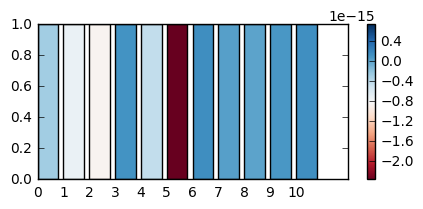

In [188]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(left_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_rw_rt = pd.DataFrame({"x":x,"y":y,"c":c_r})


cmap = plt.cm.RdBu
#cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df_rw_rt.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [67]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_l = list(right_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_lw_rt = pd.DataFrame({"x":x,"y":y,"c":c_l})


#cmap = plt.cm.RdBu
cmap = plt.cm.viridis
#cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df_lw_rt.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

NameError: name 'right_muscles_right_turn' is not defined

In [156]:
right_turn_kine_new_df_filledna = right_turn_kine_new_df.fillna(0)

In [206]:
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
    
for flynum in fly_nums:
    df=(left_turn_kine.loc[left_turn_kine['fly_num']==flynum])
    #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    average_activity = np.mean(state_mtrx,axis = 1)[:,None]
    #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
left_turn_kine_means_activity_df = pd.DataFrame(fly_averages)  
left_turn_kine_means_activity_df_2 = pd.DataFrame(fly_less_filtered)


left_turn_kine_means_activity_df


['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide


Muscles  \
0   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
1   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
2   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
3   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
4   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
5   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
6   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
7   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
8   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
9   [b1_right, b1_left, b2_right, b2_left, b3_righ...   
10  [b1_right, b1_left, b2_right, b2_left, b3_righ...   
11  [b1_right, b1_left, b2_right, b2_left, b3_righ...   
12  [b1_right, b1_left, b2_right, b2_left, b3_righ...   

                              centered_standard_means   fly  
0   [[-3.46710612028e-15], [4.28037792627e-17], [2...  1389  
1   [[1.57898385724e-15], [-7.31011045021e-15], [-...  1390  
2   [[4.68489715886e-16], [1.24930590903e-15], [8....  1391  
3   [[2.62826797363e-14], [-9.59972841959e-15], [2...  1392  
4   [[1.7763568394e-15], [4.93722709774e-15], [1.0...  1393  
5   [[-3.98105504433e-15], [2.21729648039e-15], [-...  1394  
6   [[-6.39068022695e-15], [8.45083372117e-15], [1...  1395  
7   [[-5.70062939865e-16], [-8.14375628378e-16], [...  1396  
8   [[2.3234477291e-15], [-1.62101004356e-16], [-9...  1397  
9   [[3.23012057353e-15], [4.94363460022e-16], [9....  1398  
10  [[-1.06581410364e-15], [7.06101843662e-15], [-...  1399  
11  [[-2.77111666946e-15], [-9.71075072205e-16], [...  1400  
12  [[-2.70682946956e-15], [-4.81214127922e-15], [...  1401

In [213]:
### do a nicer job organizing this dataframe

mean_of_means = np.mean(left_turn_kine_means_activity_df ['centered_standard_means'])

muscles = left_turn_kine_means_activity_df ['Muscles'][0]

#d= pd.DataFrame()

b = 'basalare'
i = 'first_axillary'
iii = 'third_axillary'
h = 'hgs'

#d = pd.DataFrame(mean_of_means)
#d['averages_muscle_activity']= mean_of_means

averages_muscle = pd.Series(mean_of_means.flatten())

print(muscles)

wing_list = ['right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left']
sclerite_group = [b, b, b, b, b, b, h, h, h, h, h, h, h, h, i, i, i, i, iii, iii, iii, iii]
muscle_number = [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 1, 1, 3, 3]
muscle_number_landr = [1, -1, 2, -2, 3, -3, 1, -1, 2, -2, 3, -3, 4, -4, 1, -1, 2, -2, 1, -1, 3, -3]
sclerite_group_number = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
muscles = list(muscles)

d = {'averages_muscle_activity': averages_muscle, 'wing_list': wing_list, 'sclerite_group': sclerite_group, 'muscle_number': muscle_number, 'muscles': muscles , 'sclerite_group_number': sclerite_group_number, 'muscle_number_landr': muscle_number_landr  }

left_turn_kine_new_df = pd.DataFrame(d)
left_turn_kine_new_df.head()

left_turn_kine_new_df.to_csv('right_turn_kine_new_df.csv')


left_turn_kine_new_df_filledna = left_turn_kine_new_df.fillna(0)

right_muscles_left_turn = left_turn_kine_new_df_filledna.loc[(left_turn_kine_new_df_filledna['wing_list'] == 'right')]

left_muscles_left_turn = left_turn_kine_new_df_filledna.loc[(left_turn_kine_new_df_filledna['wing_list'] == 'left')]




import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(left_muscles_left_turn['averages_muscle_activity'])#*(10^100))
df_rw_lt = pd.DataFrame({"x":x,"y":y,"c":c_r})


cmap = plt.cm.RdBu


import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_l = list(right_muscles_right_turn['averages_muscle_activity'])#*(10^100))
df_lw_lt = pd.DataFrame({"x":x,"y":y,"c":c_l})



['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


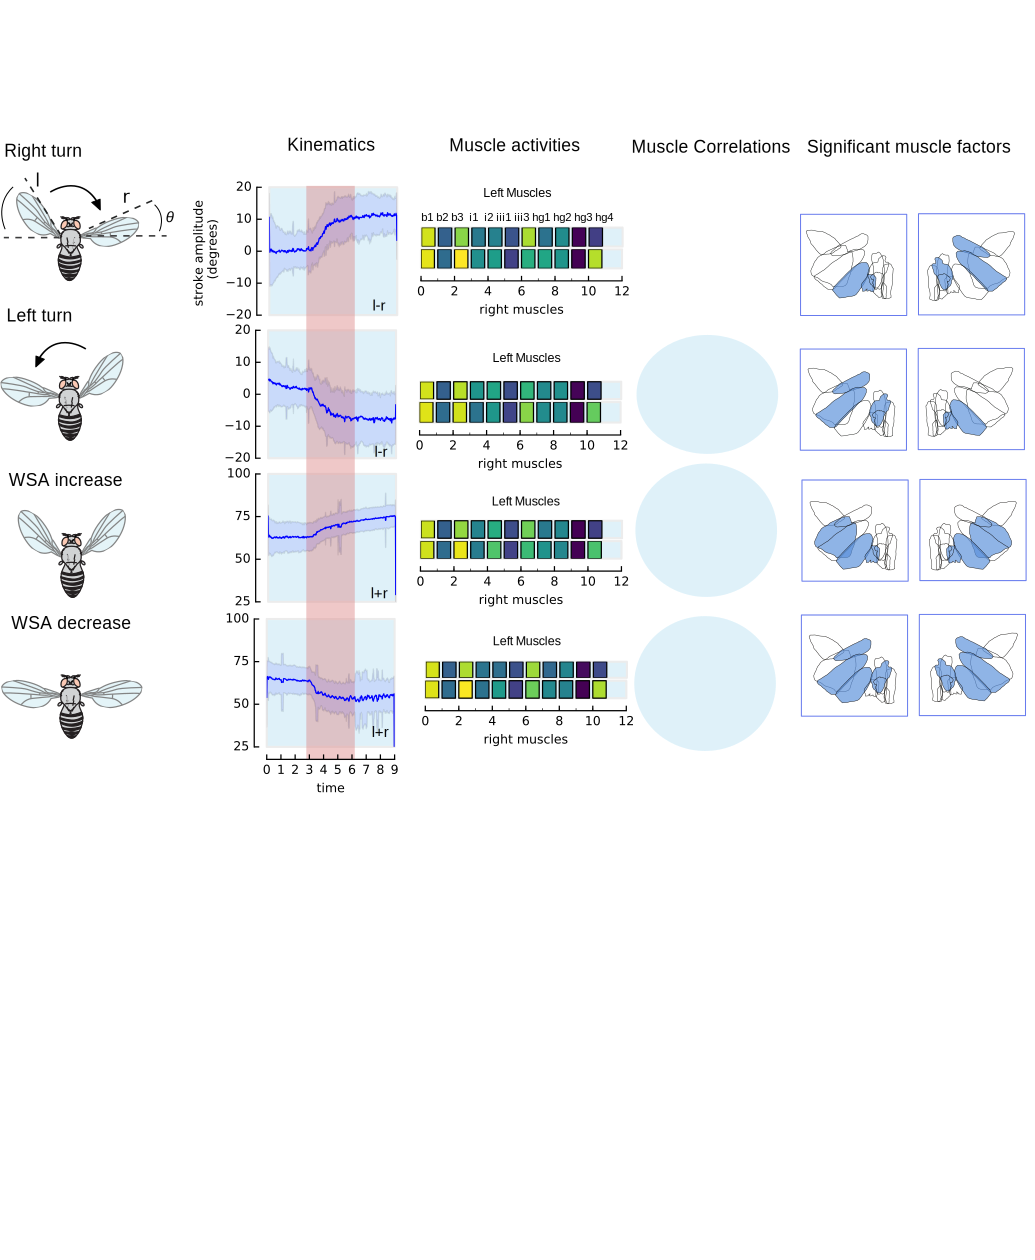

In [95]:

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

layout = fifi.FigureLayout('paper_figure_3_v2.svg',make_mplfigures = True)





#layout = fifi.FigureLayout('paper_figure_2_v3.svg',make_mplfigures = True)

layout.axes['l_turn_lmr'].plot(time, rad_to_deg(mean_WBA)) #,'o',alpha = 0.2)
layout.axes['l_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA-error)), rad_to_deg((mean_WBA + error)),alpha = 0.1)
layout.axes['l_turn_lmr'].set_ybound(-20, 20)
#layout.axes['hg3_r'].set_yticks([-15, 0, 15])
layout.axes['l_turn_lmr'].set_yticks([-20, -10, 0, 10, 20])


layout.axes['r_turn_lmr'].plot(time, rad_to_deg(mean_WBA_turn_right)) #,'o',alpha = 0.2)
layout.axes['r_turn_lmr'].fill_between(time, rad_to_deg((mean_WBA_turn_right-error_turn_right)), rad_to_deg(mean_WBA_turn_right + error_turn_right),alpha = 0.1)
layout.axes['r_turn_lmr'].set_ybound(-20, 20)
layout.axes['r_turn_lmr'].set_ylabel('stroke amplitude \n (degrees)')
layout.axes['r_turn_lmr'].set_yticks([-20, -10, 0, 10, 20])


layout.axes['WSA_dec_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_increase)) #,'o',alpha = 0.2)
layout.axes['WSA_dec_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_increase-error_WSA_increase), rad_to_deg(mean_WBA_WSA_increase + error_WSA_increase),alpha = 0.1)
layout.axes['WSA_dec_lpr'].set_ybound(25, 100)
layout.axes['WSA_dec_lpr'].set_xlabel('time')
layout.axes['WSA_dec_lpr'].set_yticks([25, 50, 75, 100])

layout.axes['WSA_inc_lpr'].plot(time, rad_to_deg(mean_WBA_WSA_decrease)) #,'o',alpha = 0.2)
layout.axes['WSA_inc_lpr'].fill_between(time, rad_to_deg(mean_WBA_WSA_decrease-error_WSA_decrease), rad_to_deg(mean_WBA_WSA_decrease + error_WSA_decrease),alpha = 0.1)
layout.axes['WSA_inc_lpr'].set_ybound(25, 100)
layout.axes['WSA_inc_lpr'].set_yticks([25, 50, 75, 100])


#fifi.mpl_functions.set_spines(layout)
#layout.save('figure_2.2.svg')
#plt.close('all')
#display(SVG('figure_2.2.svg'))

#### now matrices






df_left_turn=  pd.read_csv('left_turn_activity_matrix.csv')
df_right_turn=  pd.read_csv('right_turn_activity_matrix.csv')


Min = 0.
Max = 0.72

#x = list(pitch_down_new_df['muscles'])
x = np.arange(11)
y =1
#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r = list(df_left_turn['averages_left_muscle_activity'])#*(10^100))
c_r_2 = list(df_left_turn['averages_right_muscle_activity'])
df_left_turn_lm= pd.DataFrame({"x":x,"y":y,"c":c_r})
df_left_turn_rm= pd.DataFrame({"x":x,"y":y,"c":c_r_2})

c_r_1 = list(df_right_turn['averages_left_muscle_activity'])#*(10^100))
c_r_3 = list(df_right_turn['averages_right_muscle_activity'])
df_right_turn_lm= pd.DataFrame({"x":x,"y":y,"c":c_r_1})
df_right_turn_rm= pd.DataFrame({"x":x,"y":y,"c":c_r_3})

cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)


#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r_4 = list(WSA_increase_matrix['averages_left_muscle_activity'])#*(10^100))
c_r_5 = list(WSA_increase_matrix['averages_right_muscle_activity'])
df_WSAi_lm= pd.DataFrame({"x":x,"y":y,"c":c_r_4})
df_WSAi_rm= pd.DataFrame({"x":x,"y":y,"c":c_r_5})


#y = list(right_turn_kine_new_df['averages_muscle_activity']*(10^160))
c_r_6 = list(WSA_decrease_matrix['averages_left_muscle_activity'])#*(10^100))
c_r_7 = list(WSA_decrease_matrix['averages_right_muscle_activity'])
df_WSAd_lm= pd.DataFrame({"x":x,"y":y,"c":c_r_6})
df_WSAd_rm= pd.DataFrame({"x":x,"y":y,"c":c_r_7})


cmap = plt.cm.viridis
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

#fig, ax = plt.subplots()
#ax.bar(df_left_turn.x, df_1.y, color=cmap(norm(df_1.c.values)))
#ax.set_xticks(df_1.x)

#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])  # only needed for matplotlib < 3.1
#fig.colorbar(sm)

#plt.show()



#layout.axes['lm_matrix_rt'].set_title('left muscles')
layout.axes['lm_matrix_rt'].bar(df_right_turn_lm.x, df_right_turn_lm.y, color=cmap(norm(df_right_turn_lm.c.values))) #,'o',alpha = 0.2)
#layout.axes['lm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
#layout.axes['lm_matrix_rt'].set_ybound(40, 100)
#layout.axes['lm_matrix_rt'].set_xlabel('left muscles')


layout.axes['rm_matrix_rt'].bar(df_right_turn_rm.x, df_right_turn_rm.y, color=cmap(norm(df_right_turn_rm.c.values))) #,'o',alpha = 0.2)
#layout.axes['rm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
layout.axes['rm_matrix_rt'].set_xlabel('right muscles')
layout.axes['rm_matrix_rt'].set_xbound(0, 11)
#layout.axes['rm_matrix_rt'].set_xticks(['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'])
layout.axes['rm_matrix_rt'].set_xticks(np.arange(11), ('b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'))


#layout.axes['lm_matrix_lt'].set_title('left muscles')
layout.axes['lm_matrix_lt'].bar(df_left_turn_lm.x, df_left_turn_lm.y, color=cmap(norm(df_left_turn_lm.c.values))) #,'o',alpha = 0.2)
#layout.axes['lm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
#layout.axes['lm_matrix_rt'].set_ybound(40, 100)
#layout.axes['lm_matrix_rt'].set_xlabel('left muscles')


layout.axes['rm_matrix_lt'].bar(df_left_turn_rm.x, df_left_turn_rm.y, color=cmap(norm(df_left_turn_rm.c.values))) #,'o',alpha = 0.2)
#layout.axes['rm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
layout.axes['rm_matrix_lt'].set_xlabel('right muscles')
layout.axes['rm_matrix_lt'].set_xbound(0, 11)
#layout.axes['rm_matrix_rt'].set_xticks(['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'])
layout.axes['rm_matrix_lt'].set_xticks(np.arange(11), ('b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'))



#df_WSA_increase_lm

#layout.axes['lm_matrix_lt'].set_title('left muscles')
layout.axes['lm_matrix_WSAd'].bar(df_WSAd_lm.x, df_WSAd_lm.y, color=cmap(norm(df_WSAd_lm.c.values))) #,'o',alpha = 0.2)
#layout.axes['lm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
#layout.axes['lm_matrix_rt'].set_ybound(40, 100)
#layout.axes['lm_matrix_rt'].set_xlabel('left muscles')


layout.axes['rm_matrix_WSAd'].bar(df_WSAd_rm.x, df_WSAd_rm.y, color=cmap(norm(df_WSAd_rm.c.values))) #,'o',alpha = 0.2)
#layout.axes['rm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
layout.axes['rm_matrix_WSAd'].set_xlabel('right muscles')
layout.axes['rm_matrix_WSAd'].set_xbound(0, 11)
#layout.axes['rm_matrix_rt'].set_xticks(['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'])
layout.axes['rm_matrix_WSAd'].set_xticks(np.arange(11), ('b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'))



#layout.axes['lm_matrix_lt'].set_title('left muscles')
layout.axes['lm_matrix_WSAi'].bar(df_WSAi_lm.x, df_WSAi_lm.y, color=cmap(norm(df_WSAi_lm.c.values))) #,'o',alpha = 0.2)
#layout.axes['lm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
#layout.axes['lm_matrix_rt'].set_ybound(40, 100)
#layout.axes['lm_matrix_rt'].set_xlabel('left muscles')


layout.axes['rm_matrix_WSAi'].bar(df_WSAi_rm.x, df_WSAi_rm.y, color=cmap(norm(df_WSAi_rm.c.values))) #,'o',alpha = 0.2)
#layout.axes['rm_matrix_rt'].ScalarMappable(cmap=cmap, norm=norm)
layout.axes['rm_matrix_WSAi'].set_xlabel('right muscles')
layout.axes['rm_matrix_WSAi'].set_xbound(0, 11)
#layout.axes['rm_matrix_rt'].set_xticks(['b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'])
layout.axes['rm_matrix_WSAi'].set_xticks(np.arange(11), ('b1', 'b2', 'b3', 'hg1', 'hg2', 'hg3', 'hg4', 'i1', 'i2', 'iii1', 'iii3'))





fifi.mpl_functions.set_spines(layout)
layout.save('figure_2_v6.svg')
plt.close('all')
display(SVG('figure_2_v6.svg'))